In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

In [2]:
df=pd.read_csv('bank_marketing_part1_Data-1.csv') 

In [3]:
df.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  
0         3.763            3.252                         6.550  
1         3.582            3.336                         5.144  
2         3.755            3.368                         6.148  
3         2.641            5.182                         5.185  
4         3.694            2.068                         5.837

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
df1=df.describe().T
df1['range']=df1['max']-df1['min']
df1['IQR']=df1['75%']-df1['25%']
df1['CV']=df1['std']/df1['mean']
df1['mode1']=df.mode().T[0]
df1['mode2']=df.mode().T[1]
df1['mode3']=df.mode().T[2]
#df1['mode4']=df.mode().T[3]
round(df1.drop('count',axis=1).rename(columns = {'50%':'median'}),2)

mean   std    min    25%  median    75%    max  \
spending                      14.85  2.91  10.59  12.27   14.36  17.30  21.18   
advance_payments              14.56  1.31  12.41  13.45   14.32  15.72  17.25   
probability_of_full_payment    0.87  0.02   0.81   0.86    0.87   0.89   0.92   
current_balance                5.63  0.44   4.90   5.26    5.52   5.98   6.68   
credit_limit                   3.26  0.38   2.63   2.94    3.24   3.56   4.03   
min_payment_amt                3.70  1.50   0.77   2.56    3.60   4.77   8.46   
max_spent_in_single_shopping   5.41  0.49   4.52   5.04    5.22   5.88   6.55   

                              range   IQR    CV  mode1  mode2  mode3  
spending                      10.59  5.04  0.20  11.23  14.11  15.38  
advance_payments               4.84  2.27  0.09  13.47    NaN    NaN  
probability_of_full_payment    0.11  0.03  0.03   0.88    NaN    NaN  
current_balance                1.78  0.72  0.08   5.24   5.40    NaN  
credit_limit                   1.40  0.62  0.12   3.03    NaN    NaN  
min_payment_amt                7.69  2.21  0.41   2.13   2.22   2.70  
max_spent_in_single_shopping   2.03  0.83  0.09   5.00    NaN    NaN

In [6]:
df.isnull().sum().sum()

0

In [7]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [8]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("--------------------------------")
    print(df[column].describe(),end=' ')
    
    
    print("\n\nDistribution of " + column)
    print("-------------------------------------")
    sns.displot(df[column], kde=1, color='g',bins=nbins);
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("------------------------------")
    ax = sns.boxplot(x=df[column]);
    plt.show()


Description of spending
--------------------------------
count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64 

Distribution of spending
-------------------------------------


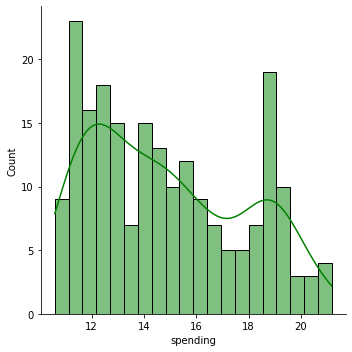

BoxPlot of spending
------------------------------


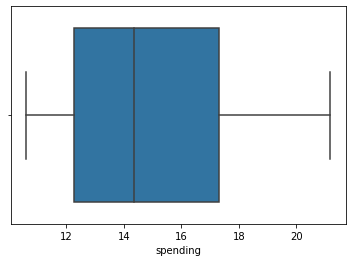

Description of advance_payments
--------------------------------
count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64 

Distribution of advance_payments
-------------------------------------


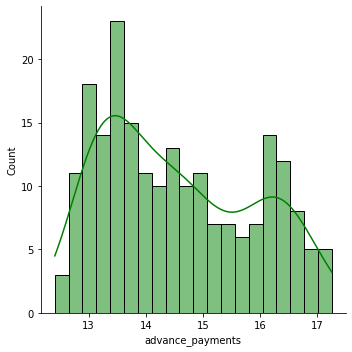

BoxPlot of advance_payments
------------------------------


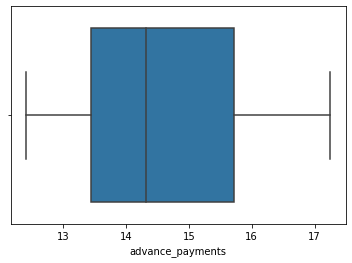

Description of probability_of_full_payment
--------------------------------
count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64 

Distribution of probability_of_full_payment
-------------------------------------


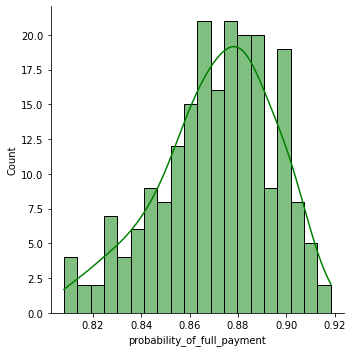

BoxPlot of probability_of_full_payment
------------------------------


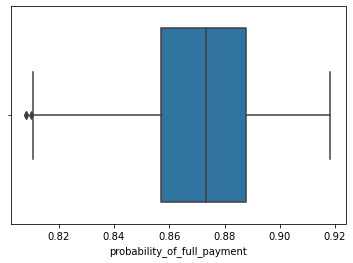

Description of current_balance
--------------------------------
count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: current_balance, dtype: float64 

Distribution of current_balance
-------------------------------------


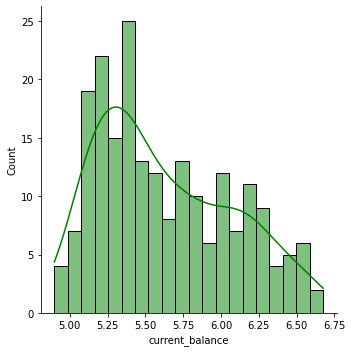

BoxPlot of current_balance
------------------------------


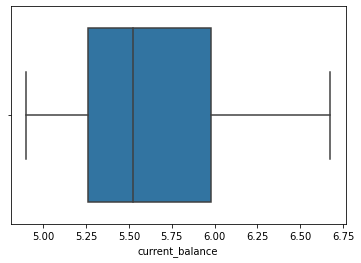

Description of credit_limit
--------------------------------
count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: credit_limit, dtype: float64 

Distribution of credit_limit
-------------------------------------


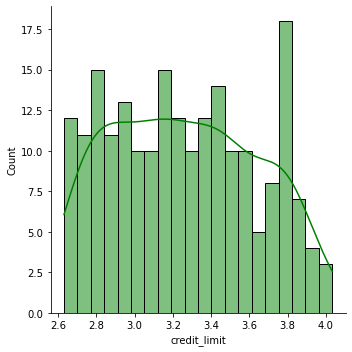

BoxPlot of credit_limit
------------------------------


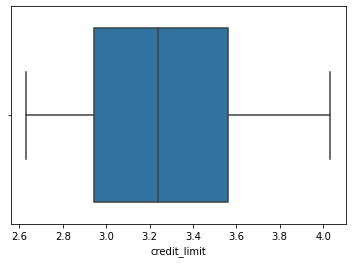

Description of min_payment_amt
--------------------------------
count    210.000000
mean       3.700201
std        1.503557
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.456000
Name: min_payment_amt, dtype: float64 

Distribution of min_payment_amt
-------------------------------------


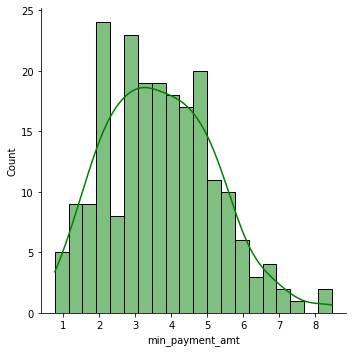

BoxPlot of min_payment_amt
------------------------------


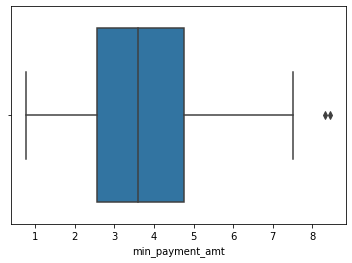

Description of max_spent_in_single_shopping
--------------------------------
count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: max_spent_in_single_shopping, dtype: float64 

Distribution of max_spent_in_single_shopping
-------------------------------------


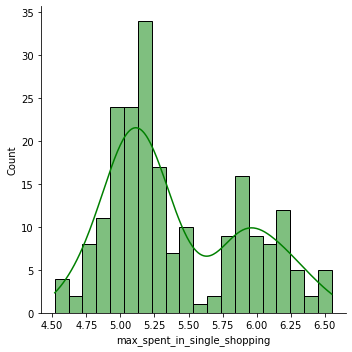

BoxPlot of max_spent_in_single_shopping
------------------------------


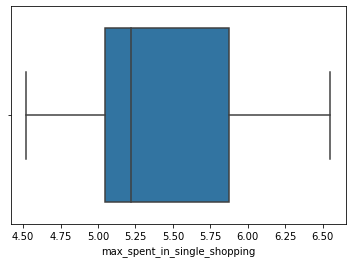

In [9]:
lstcolumns = list(df.columns.values)
for x in lstcolumns:
    univariateAnalysis_numeric(x,20)

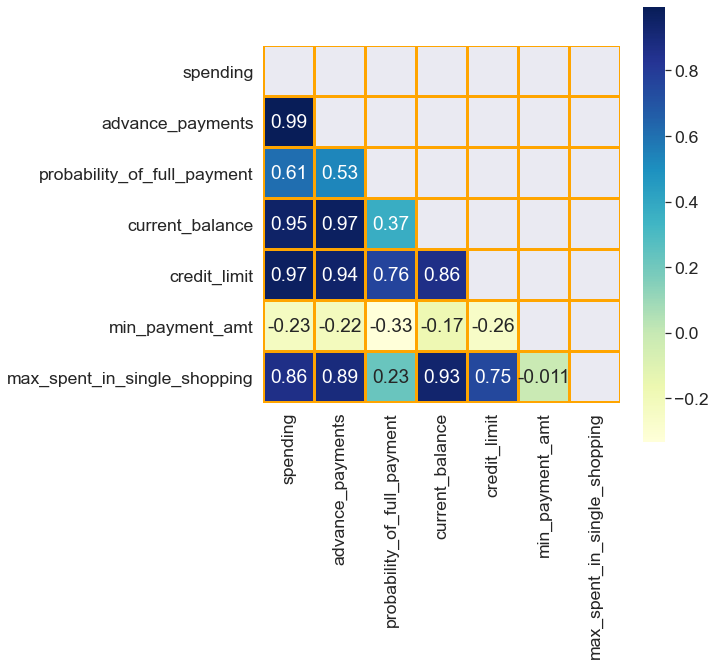

In [10]:
plt.figure(figsize=(8,8))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.set(font_scale=1.6)
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True,linewidths=2,
                linecolor='orange',square=True,mask=mask);
sns.set(font_scale=1)

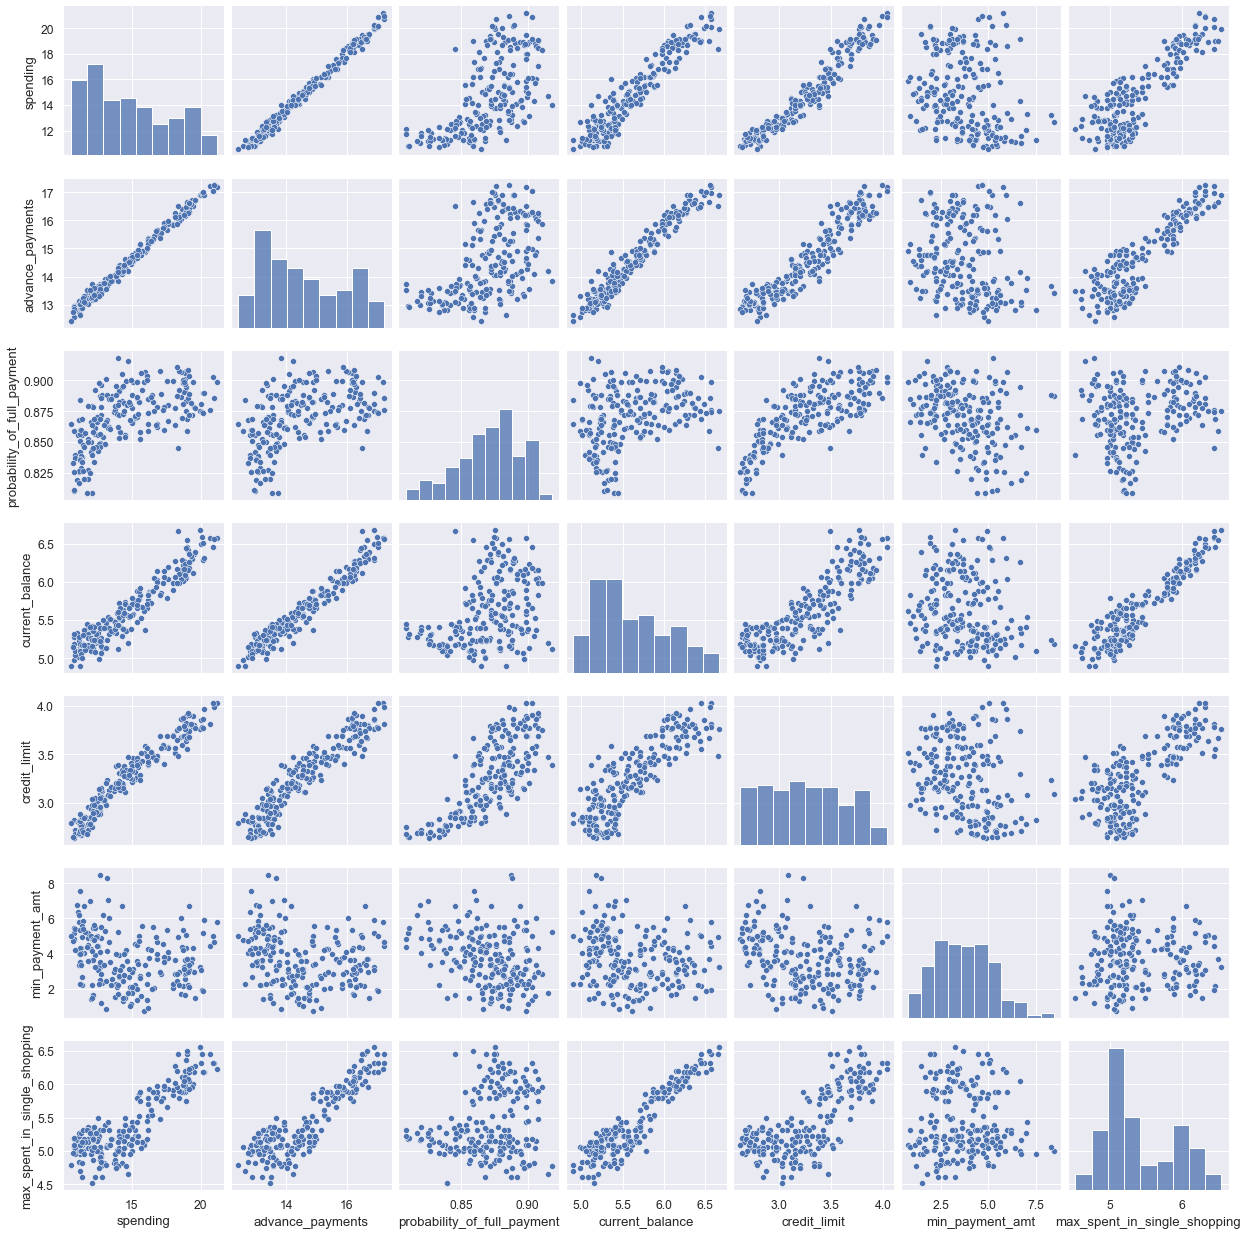

In [11]:
sns.set(font_scale=1.1)
sns.pairplot(df).savefig('out_n.jpg')
sns.set(font_scale=1)

In [12]:
#import scipy.stats as stats
%matplotlib inline

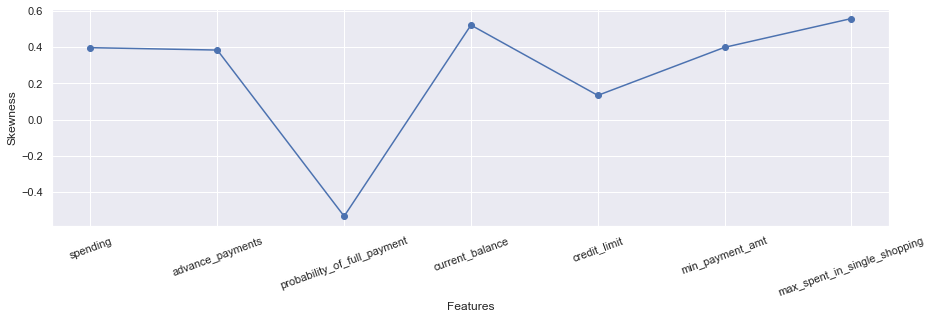

In [13]:
pd.DataFrame(stats.skew(df),index=df.columns).plot(kind='line',grid=1,figsize=(15,4),rot=20,legend=0,xlabel='Features',ylabel='Skewness',marker='o');

In [14]:
def treat_outlier(x):
    # taking 25,75 percentile of column
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: upper_bound if y > upper_bound else y).apply(lambda y: lower_bound if y < lower_bound else y)

In [15]:
outlier_list = ['probability_of_full_payment' , 'min_payment_amt']

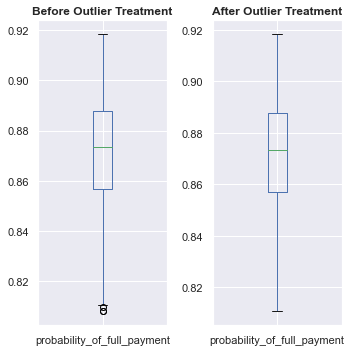

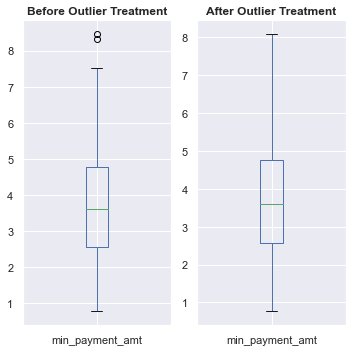

In [16]:
for i in outlier_list:
    
    plt.subplot(1,2,1)
    plt.title('Before Outlier Treatment',weight="bold")
    df[i].plot(kind='box',figsize=(5,5));
    
    df[i] = treat_outlier(df[i])
    
    plt.subplot(1,2,2)
    plt.title('After Outlier Treatment',weight="bold")
    df[i].plot(kind='box',figsize=(5,5));
    plt.tight_layout()
    plt.show()

In [17]:
df

spending  advance_payments  probability_of_full_payment  current_balance  \
0       19.94             16.92                     0.875200            6.675   
1       15.99             14.89                     0.906400            5.363   
2       18.95             16.42                     0.882900            6.248   
3       10.83             12.96                     0.810588            5.278   
4       17.99             15.86                     0.899200            5.890   
..        ...               ...                          ...              ...   
205     13.89             14.02                     0.888000            5.439   
206     16.77             15.62                     0.863800            5.927   
207     14.03             14.16                     0.879600            5.438   
208     16.12             15.00                     0.900000            5.709   
209     15.57             15.15                     0.852700            5.920   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  
0           3.763            3.252                         6.550  
1           3.582            3.336                         5.144  
2           3.755            3.368                         6.148  
3           2.641            5.182                         5.185  
4           3.694            2.068                         5.837  
..            ...              ...                           ...  
205         3.199            3.986                         4.738  
206         3.438            4.920                         5.795  
207         3.201            1.717                         5.001  
208         3.485            2.270                         5.443  
209         3.231            2.640                         5.879  

[210 rows x 7 columns]

In [18]:
df1=df.describe().T
df1['range']=df1['max']-df1['min']
df1['IQR']=df1['75%']-df1['25%']
df1['CV']=df1['std']/df1['mean']
df1['mode1']=df.mode().T[0]
df1['mode2']=df.mode().T[1]
df1['mode3']=df.mode().T[2]
#df1['mode4']=df.mode().T[3]
round(df1.drop('count',axis=1).rename(columns = {'50%':'median'}),2)

mean   std    min    25%  median    75%    max  \
spending                      14.85  2.91  10.59  12.27   14.36  17.30  21.18   
advance_payments              14.56  1.31  12.41  13.45   14.32  15.72  17.25   
probability_of_full_payment    0.87  0.02   0.81   0.86    0.87   0.89   0.92   
current_balance                5.63  0.44   4.90   5.26    5.52   5.98   6.68   
credit_limit                   3.26  0.38   2.63   2.94    3.24   3.56   4.03   
min_payment_amt                3.70  1.49   0.77   2.56    3.60   4.77   8.08   
max_spent_in_single_shopping   5.41  0.49   4.52   5.04    5.22   5.88   6.55   

                              range   IQR    CV  mode1  mode2  mode3  
spending                      10.59  5.04  0.20  11.23  14.11  15.38  
advance_payments               4.84  2.27  0.09  13.47    NaN    NaN  
probability_of_full_payment    0.11  0.03  0.03   0.81   0.88    NaN  
current_balance                1.78  0.72  0.08   5.24   5.40    NaN  
credit_limit                   1.40  0.62  0.12   3.03    NaN    NaN  
min_payment_amt                7.31  2.21  0.40   2.13   2.22   2.70  
max_spent_in_single_shopping   2.03  0.83  0.09   5.00    NaN    NaN

In [19]:
from scipy.stats import zscore
data_scaled=df.apply(zscore)
data_scaled

spending  advance_payments  probability_of_full_payment  current_balance  \
0    1.754355          1.811968                     0.177628         2.367533   
1    0.393582          0.253840                     1.505071        -0.600744   
2    1.413300          1.428192                     0.505234         1.401485   
3   -1.384034         -1.227533                    -2.571391        -0.793049   
4    1.082581          0.998364                     1.198738         0.591544   
..        ...               ...                          ...              ...   
205 -0.329866         -0.413929                     0.722220        -0.428801   
206  0.662292          0.814152                    -0.307399         0.675253   
207 -0.281636         -0.306472                     0.364831        -0.431064   
208  0.438367          0.338271                     1.232775         0.182048   
209  0.248893          0.453403                    -0.779662         0.659416   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  
0        1.338579        -0.298625                      2.328998  
1        0.858236        -0.242292                     -0.538582  
2        1.317348        -0.220832                      1.509107  
3       -1.639017         0.995699                     -0.454961  
4        1.155464        -1.092656                      0.874813  
..            ...              ...                           ...  
205     -0.158181         0.193620                     -1.366631  
206      0.476084         0.819993                      0.789153  
207     -0.152873        -1.328049                     -0.830235  
208      0.600814        -0.957188                      0.071238  
209     -0.073258        -0.709053                      0.960473  

[210 rows x 7 columns]

In [20]:
df1=data_scaled.describe().T
df1['range']=df1['max']-df1['min']
df1['IQR']=df1['75%']-df1['25%']
df1['CV']=df1['std']/df1['mean']
df1['mode1']=data_scaled.mode().T[0]
df1['mode2']=data_scaled.mode().T[1]
df1['mode3']=data_scaled.mode().T[2]
#df1['mode4']=data_scaled.mode().T[3]
round(df1.drop('count',axis=1).rename(columns = {'50%':'median'}),2)

mean  std   min   25%  median   75%   max  \
spending                       0.0  1.0 -1.47 -0.89   -0.17  0.85  2.18   
advance_payments               0.0  1.0 -1.65 -0.85   -0.18  0.89  2.07   
probability_of_full_payment    0.0  1.0 -2.57 -0.60    0.10  0.71  2.01   
current_balance               -0.0  1.0 -1.65 -0.83   -0.24  0.79  2.37   
credit_limit                  -0.0  1.0 -1.67 -0.83   -0.06  0.80  2.06   
min_payment_amt                0.0  1.0 -1.97 -0.76   -0.07  0.72  2.94   
max_spent_in_single_shopping  -0.0  1.0 -1.81 -0.74   -0.38  0.96  2.33   

                              range   IQR            CV  mode1  mode2  mode3  
spending                       3.65  1.73  1.095655e+15  -1.25  -0.25   0.18  
advance_payments               3.71  1.74  9.137502e+15  -0.84    NaN    NaN  
probability_of_full_payment    4.58  1.31  6.102451e+14  -2.57   0.48    NaN  
current_balance                4.02  1.62 -9.204037e+15  -0.89  -0.53    NaN  
credit_limit                   3.72  1.64 -3.347661e+15  -0.62    NaN    NaN  
min_payment_amt                4.91  1.48  6.629481e+15  -1.05  -0.99  -0.67  
max_spent_in_single_shopping   4.14  1.70 -5.178999e+14  -0.83    NaN    NaN

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
# 'linkage' clusters the data from n to 1.
wardlink = linkage(data_scaled, method = 'ward')

In [22]:
from scipy.cluster.hierarchy import fcluster
clusters_ward = fcluster(wardlink, t=3, criterion='maxclust') # 'criterion' is applied on 't', here 3 clusters will be formed because of 'maxclust'
clusters_ward

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [23]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(data_scaled,clusters_ward)

0.39285647559324033

In [24]:
s_s=[]
for i in range(2,8):
    clusters = fcluster(wardlink, t=i, criterion='maxclust')
    s_s.append(silhouette_score(data_scaled,clusters))
s_s

[0.46115804408189065,
 0.39285647559324033,
 0.30117648618504916,
 0.24048515735060025,
 0.21512132138555137,
 0.23254866834248084]

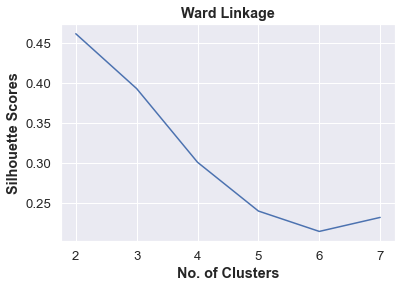

In [25]:
sns.set(font_scale=1.2)
plt.ylabel('Silhouette Scores',weight="bold")
plt.xlabel('No. of Clusters',weight="bold")
plt.title('Ward Linkage',weight="bold")
plt.plot(range(2,8), s_s)
sns.set(font_scale=1)

[0.44118916968648897,
 0.3760282261979445,
 0.3526121671249803,
 0.30495333562445376,
 0.29324876770905217,
 0.28446600775208575]

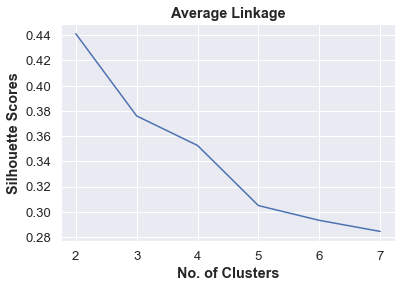

In [26]:
# average link
avglink = linkage(data_scaled, method = 'average')

s_s=[]
for i in range(2,8):
    clusters = fcluster(avglink, t=i, criterion='maxclust')
    s_s.append(silhouette_score(data_scaled,clusters))
display(s_s)

sns.set(font_scale=1.2)
plt.ylabel('Silhouette Scores',weight="bold")
plt.xlabel('No. of Clusters',weight="bold")
plt.title('Average Linkage',weight="bold")
plt.plot(range(2,8), s_s)
sns.set(font_scale=1)

[0.46303458955269033,
 0.3372758529705197,
 0.3767425424949836,
 0.33049327815036583,
 0.2517679493025941,
 0.19599291370417574]

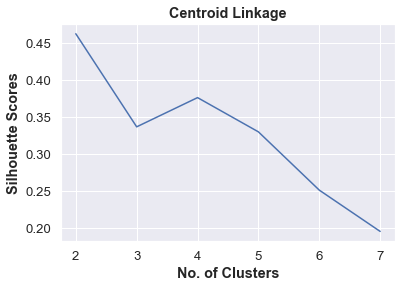

In [27]:
# centroid link
centroid = linkage(data_scaled, method = 'centroid')

s_s=[]
for i in range(2,8):
    clusters = fcluster(centroid, t=i, criterion='maxclust')
    s_s.append(silhouette_score(data_scaled,clusters))
display(s_s)

sns.set(font_scale=1.2)
plt.ylabel('Silhouette Scores',weight="bold")
plt.xlabel('No. of Clusters',weight="bold")
plt.title('Centroid Linkage',weight="bold")
plt.plot(range(2,8), s_s)
sns.set(font_scale=1)

[0.05734334368197974,
 -0.012530952510587173,
 -0.05598386279058719,
 -0.21626419651953077,
 -0.22410577180736738,
 -0.27184477944884056]

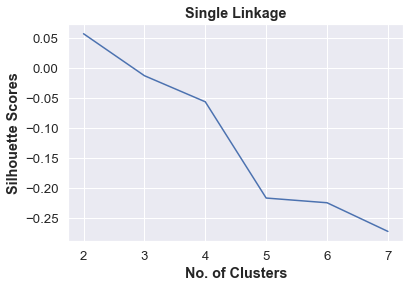

In [28]:
# single link
single = linkage(data_scaled, method = 'single')

s_s=[]
for i in range(2,8):
    clusters = fcluster(single, t=i, criterion='maxclust')
    s_s.append(silhouette_score(data_scaled,clusters))
display(s_s)

sns.set(font_scale=1.2)
plt.ylabel('Silhouette Scores',weight="bold")
plt.xlabel('No. of Clusters',weight="bold")
plt.title('Single Linkage',weight="bold")
plt.plot(range(2,8), s_s)
sns.set(font_scale=1)

[-0.27184477944884056,
 -0.27184477944884056,
 -0.27184477944884056,
 -0.27184477944884056,
 -0.27184477944884056,
 -0.27184477944884056]

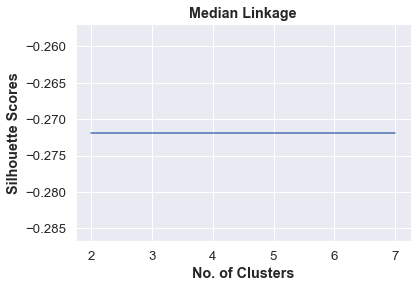

In [29]:
# median link
median = linkage(data_scaled, method = 'median')

s_s=[]
for i in range(2,8):
    clusters_median = fcluster(median, t=i, criterion='maxclust')
    s_s.append(silhouette_score(data_scaled,clusters))
display(s_s)

sns.set(font_scale=1.2)
plt.ylabel('Silhouette Scores',weight="bold")
plt.xlabel('No. of Clusters',weight="bold")
plt.title('Median Linkage',weight="bold")
plt.plot(range(2,8), s_s)
sns.set(font_scale=1)

[0.4129534071404428,
 0.3081495231698347,
 0.28997411051124405,
 0.2648432352976623,
 0.25339833145139407,
 0.22934358962423637]

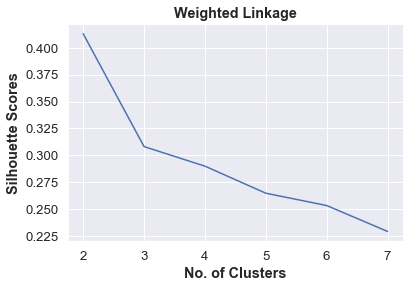

In [30]:
# weighted link
weighted = linkage(data_scaled, method = 'weighted')

s_s=[]
for i in range(2,8):
    clusters = fcluster(weighted, t=i, criterion='maxclust')
    s_s.append(silhouette_score(data_scaled,clusters))
display(s_s)

sns.set(font_scale=1.2)
plt.ylabel('Silhouette Scores',weight="bold")
plt.xlabel('No. of Clusters',weight="bold")
plt.title('Weighted Linkage',weight="bold")
plt.plot(range(2,8), s_s)
sns.set(font_scale=1)

[0.39792406518072526,
 0.2855626733932902,
 0.20751908295247892,
 0.22767263345730068,
 0.21549013974638617,
 0.23682598116076337]

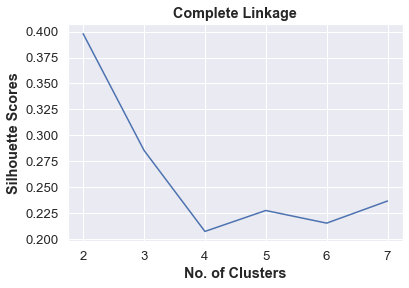

In [31]:
# complete link
complete = linkage(data_scaled, method = 'complete')

s_s=[]
for i in range(2,8):
    clusters = fcluster(complete, t=i, criterion='maxclust')
    s_s.append(silhouette_score(data_scaled,clusters))
display(s_s)

sns.set(font_scale=1.2)
plt.ylabel('Silhouette Scores',weight="bold")
plt.xlabel('No. of Clusters',weight="bold")
plt.title('Complete Linkage',weight="bold")
plt.plot(range(2,8), s_s)
sns.set(font_scale=1)

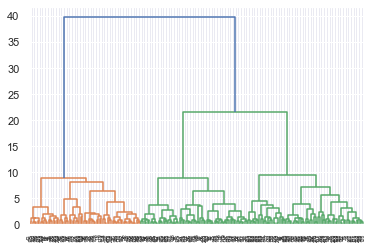

In [32]:
dend = dendrogram(wardlink)

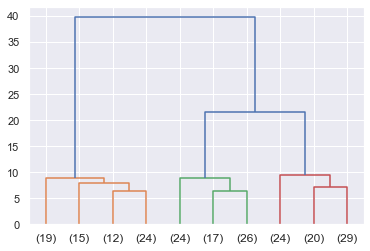

In [33]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',    # 'lastp' in truncate will show till last 'p' merges
                 p = 10,color_threshold=10
                 )

In [34]:
df['Ward Clusters'] = clusters_ward

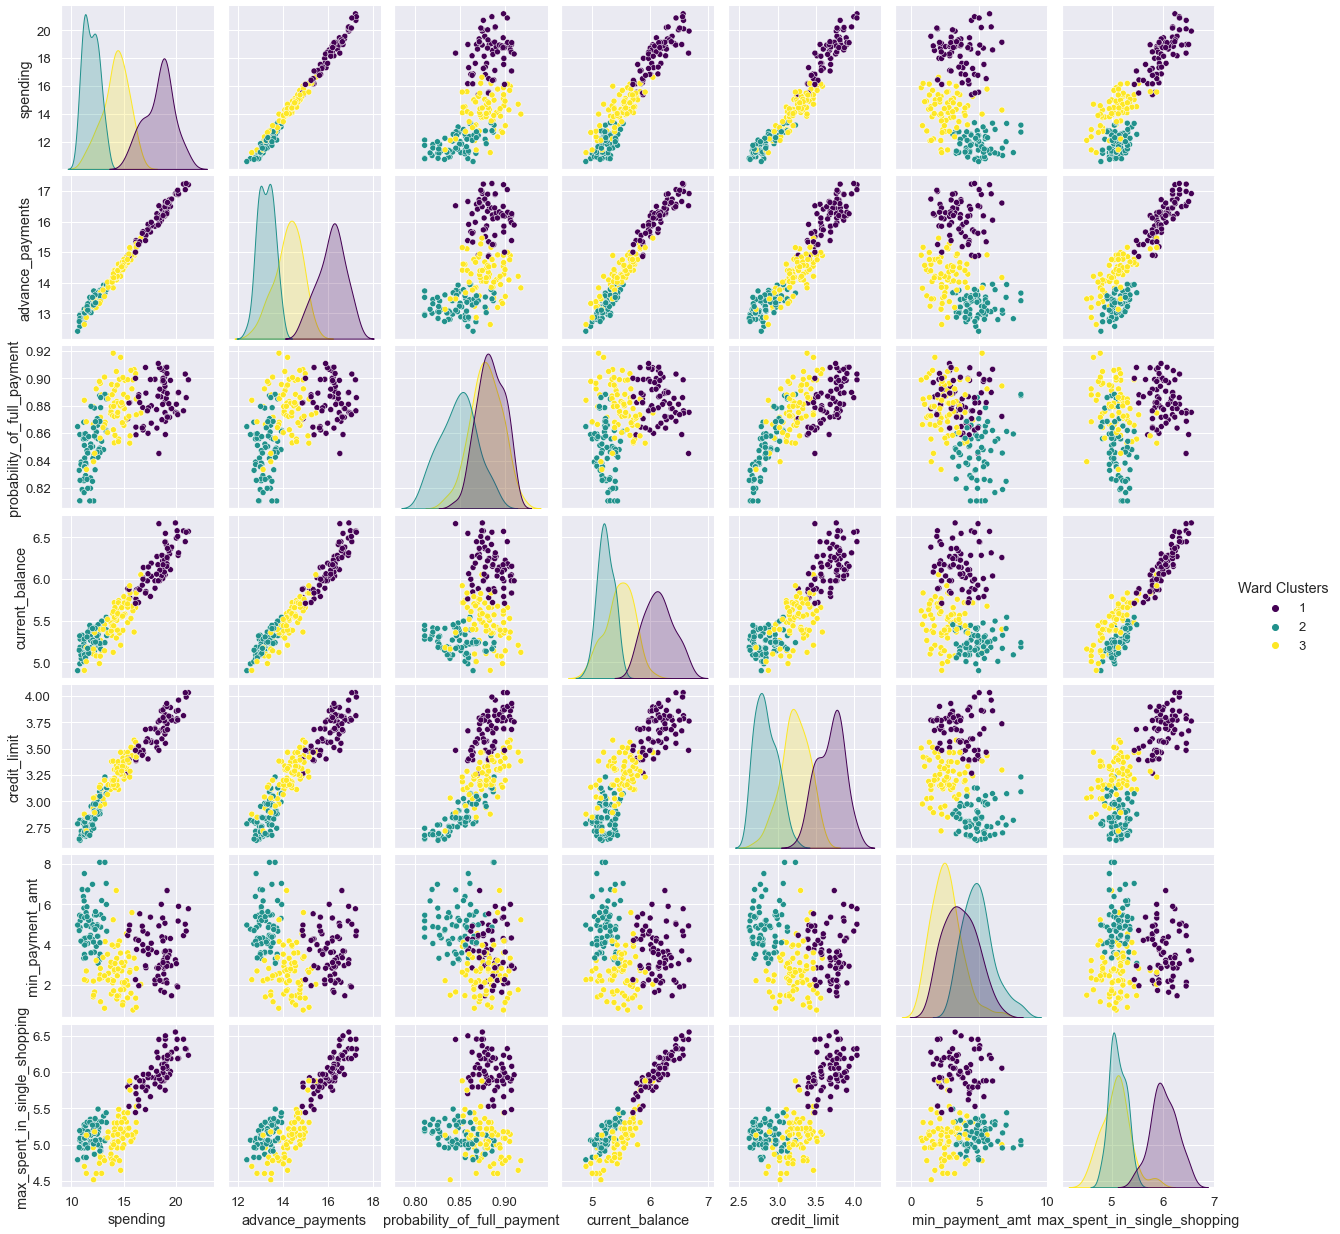

In [35]:
sns.set(font_scale=1.2)
sns.pairplot(df,hue='Ward Clusters',palette='viridis').savefig('out1.jpg');
sns.set(font_scale=1)

In [36]:
df[df['Ward Clusters']==1]

spending  advance_payments  probability_of_full_payment  current_balance  \
0       19.94             16.92                       0.8752            6.675   
2       18.95             16.42                       0.8829            6.248   
4       17.99             15.86                       0.8992            5.890   
8       18.17             16.26                       0.8637            6.271   
10      18.55             16.22                       0.8865            6.153   
..        ...               ...                          ...              ...   
198     19.18             16.63                       0.8717            6.369   
201     17.08             15.38                       0.9079            5.832   
204     16.41             15.25                       0.8866            5.718   
206     16.77             15.62                       0.8638            5.927   
208     16.12             15.00                       0.9000            5.709   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  \
0           3.763            3.252                         6.550   
2           3.755            3.368                         6.148   
4           3.694            2.068                         5.837   
8           3.512            2.853                         6.273   
10          3.674            1.738                         5.894   
..            ...              ...                           ...   
198         3.681            3.357                         6.229   
201         3.683            2.956                         5.484   
204         3.525            4.217                         5.618   
206         3.438            4.920                         5.795   
208         3.485            2.270                         5.443   

     Ward Clusters  
0                1  
2                1  
4                1  
8                1  
10               1  
..             ...  
198              1  
201              1  
204              1  
206              1  
208              1  

[70 rows x 8 columns]

In [37]:
df[df['Ward Clusters']==2]

spending  advance_payments  probability_of_full_payment  current_balance  \
3       10.83             12.96                     0.810588            5.278   
5       12.70             13.41                     0.887400            5.183   
6       12.02             13.33                     0.850300            5.350   
9       11.23             12.88                     0.851100            5.140   
12      12.15             13.45                     0.844300            5.417   
..        ...               ...                          ...              ...   
189     11.75             13.52                     0.810588            5.444   
192     12.26             13.60                     0.833300            5.408   
197     12.30             13.34                     0.868400            5.243   
199     12.01             13.52                     0.824900            5.405   
203     11.55             13.10                     0.845500            5.167   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  \
3           2.641         5.182000                         5.185   
5           3.091         8.079625                         5.000   
6           2.810         4.271000                         5.308   
9           2.795         4.325000                         5.003   
12          2.837         3.638000                         5.338   
..            ...              ...                           ...   
189         2.678         4.378000                         5.310   
192         2.833         4.756000                         5.360   
197         2.974         5.637000                         5.063   
199         2.776         6.992000                         5.270   
203         2.845         6.715000                         4.956   

     Ward Clusters  
3                2  
5                2  
6                2  
9                2  
12               2  
..             ...  
189              2  
192              2  
197              2  
199              2  
203              2  

[67 rows x 8 columns]

In [38]:
df[df['Ward Clusters']==3]

spending  advance_payments  probability_of_full_payment  current_balance  \
1       15.99             14.89                       0.9064            5.363   
7       13.74             14.05                       0.8744            5.482   
11      14.09             14.41                       0.8529            5.717   
14      12.10             13.15                       0.8793            5.105   
16      16.14             14.99                       0.9034            5.658   
..        ...               ...                          ...              ...   
200     14.88             14.57                       0.8811            5.554   
202     14.80             14.52                       0.8823            5.656   
205     13.89             14.02                       0.8880            5.439   
207     14.03             14.16                       0.8796            5.438   
209     15.57             15.15                       0.8527            5.920   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  \
1           3.582            3.336                         5.144   
7           3.114            2.932                         4.825   
11          3.186            3.920                         5.299   
14          2.941            2.201                         5.056   
16          3.562            1.355                         5.175   
..            ...              ...                           ...   
200         3.333            1.018                         4.956   
202         3.288            3.112                         5.309   
205         3.199            3.986                         4.738   
207         3.201            1.717                         5.001   
209         3.231            2.640                         5.879   

     Ward Clusters  
1                3  
7                3  
11               3  
14               3  
16               3  
..             ...  
200              3  
202              3  
205              3  
207              3  
209              3  

[73 rows x 8 columns]

In [39]:
df1=df[df['Ward Clusters']==1].describe().T
df1['range']=df1['max']-df1['min']
df1['IQR']=df1['75%']-df1['25%']
df1['CV']=df1['std']/df1['mean']
df1['mode1']=df.mode().T[0]
df1['mode2']=df.mode().T[1]
df1['mode3']=df.mode().T[2]
#df1['mode4']=df.mode().T[3]
round(df1.drop('count',axis=1).rename(columns = {'50%':'median'}),2)

mean   std    min    25%  median    75%    max  \
spending                      18.37  1.38  15.38  17.33   18.72  19.14  21.18   
advance_payments              16.15  0.60  14.86  15.74   16.21  16.56  17.25   
probability_of_full_payment    0.88  0.01   0.85   0.87    0.88   0.90   0.91   
current_balance                6.16  0.25   5.71   5.98    6.15   6.31   6.68   
credit_limit                   3.68  0.17   3.27   3.55    3.69   3.80   4.03   
min_payment_amt                3.64  1.21   1.47   2.85    3.63   4.46   6.68   
max_spent_in_single_shopping   6.02  0.25   5.44   5.88    5.98   6.19   6.55   
Ward Clusters                  1.00  0.00   1.00   1.00    1.00   1.00   1.00   

                              range   IQR    CV  mode1  mode2  mode3  
spending                       5.80  1.81  0.08  11.23  14.11  15.38  
advance_payments               2.39  0.82  0.04  13.47    NaN    NaN  
probability_of_full_payment    0.07  0.02  0.02   0.81   0.88    NaN  
current_balance                0.97  0.33  0.04   5.24   5.40    NaN  
credit_limit                   0.77  0.25  0.05   3.03    NaN    NaN  
min_payment_amt                5.21  1.61  0.33   2.13   2.22   2.70  
max_spent_in_single_shopping   1.11  0.31  0.04   5.00    NaN    NaN  
Ward Clusters                  0.00  0.00  0.00   3.00    NaN    NaN

In [40]:
df1=df[df['Ward Clusters']==2].describe().T
df1['range']=df1['max']-df1['min']
df1['IQR']=df1['75%']-df1['25%']
df1['CV']=df1['std']/df1['mean']
df1['mode1']=df.mode().T[0]
df1['mode2']=df.mode().T[1]
df1['mode3']=df.mode().T[2]
#df1['mode4']=df.mode().T[3]
round(df1.drop('count',axis=1).rename(columns = {'50%':'median'}),2)

mean   std    min    25%  median    75%    max  \
spending                      11.87  0.74  10.59  11.25   11.83  12.45  13.37   
advance_payments              13.26  0.35  12.41  13.00   13.27  13.52  13.95   
probability_of_full_payment    0.85  0.02   0.81   0.83    0.85   0.86   0.89   
current_balance                5.24  0.14   4.90   5.14    5.24   5.33   5.54   
credit_limit                   2.85  0.14   2.63   2.73    2.83   2.97   3.23   
min_payment_amt                4.94  1.14   3.08   4.12    4.86   5.47   8.08   
max_spent_in_single_shopping   5.12  0.16   4.79   5.00    5.09   5.25   5.49   
Ward Clusters                  2.00  0.00   2.00   2.00    2.00   2.00   2.00   

                              range   IQR    CV  mode1  mode2  mode3  
spending                       2.78  1.20  0.06  11.23  14.11  15.38  
advance_payments               1.54  0.52  0.03  13.47    NaN    NaN  
probability_of_full_payment    0.08  0.03  0.02   0.81   0.88    NaN  
current_balance                0.64  0.19  0.03   5.24   5.40    NaN  
credit_limit                   0.60  0.24  0.05   3.03    NaN    NaN  
min_payment_amt                5.00  1.35  0.23   2.13   2.22   2.70  
max_spent_in_single_shopping   0.70  0.25  0.03   5.00    NaN    NaN  
Ward Clusters                  0.00  0.00  0.00   3.00    NaN    NaN

In [41]:
df1=df[df['Ward Clusters']==3].describe().T
df1['range']=df1['max']-df1['min']
df1['IQR']=df1['75%']-df1['25%']
df1['CV']=df1['std']/df1['mean']
df1['mode1']=df.mode().T[0]
df1['mode2']=df.mode().T[1]
df1['mode3']=df.mode().T[2]
#df1['mode4']=df.mode().T[3]
round(df1.drop('count',axis=1).rename(columns = {'50%':'median'}),2)

mean   std    min    25%  median    75%    max  \
spending                      14.20  1.23  11.23  13.50   14.33  15.03  16.63   
advance_payments              14.23  0.60  12.63  13.85   14.28  14.67  15.46   
probability_of_full_payment    0.88  0.02   0.83   0.87    0.88   0.89   0.92   
current_balance                5.48  0.24   4.90   5.35    5.50   5.66   6.05   
credit_limit                   3.23  0.18   2.72   3.13    3.22   3.37   3.58   
min_payment_amt                2.61  1.12   0.77   1.79    2.50   3.14   6.68   
max_spent_in_single_shopping   5.09  0.28   4.52   4.87    5.10   5.22   5.88   
Ward Clusters                  3.00  0.00   3.00   3.00    3.00   3.00   3.00   

                              range   IQR    CV  mode1  mode2  mode3  
spending                       5.40  1.53  0.09  11.23  14.11  15.38  
advance_payments               2.83  0.82  0.04  13.47    NaN    NaN  
probability_of_full_payment    0.08  0.02  0.02   0.81   0.88    NaN  
current_balance                1.15  0.31  0.04   5.24   5.40    NaN  
credit_limit                   0.86  0.24  0.06   3.03    NaN    NaN  
min_payment_amt                5.92  1.35  0.43   2.13   2.22   2.70  
max_spent_in_single_shopping   1.36  0.35  0.05   5.00    NaN    NaN  
Ward Clusters                  0.00  0.00  0.00   3.00    NaN    NaN

In [42]:
round(pd.pivot_table(df,index='Ward Clusters',aggfunc=np.mean),2)

advance_payments  credit_limit  current_balance  \
Ward Clusters                                                    
1                         16.15          3.68             6.16   
2                         13.26          2.85             5.24   
3                         14.23          3.23             5.48   

               max_spent_in_single_shopping  min_payment_amt  \
Ward Clusters                                                  
1                                      6.02             3.64   
2                                      5.12             4.94   
3                                      5.09             2.61   

               probability_of_full_payment  spending  
Ward Clusters                                         
1                                     0.88     18.37  
2                                     0.85     11.87  
3                                     0.88     14.20

In [43]:
#df=pd.read_csv('bank_marketing_part1_Data-1.csv') 

In [44]:
from sklearn.cluster import KMeans

In [45]:
k_means = KMeans(n_clusters = 2)

In [46]:
k_means.fit(data_scaled)

KMeans(n_clusters=2)

In [47]:
k_means.labels_ #'.labels_' tells which observation(all 210) belongs to which cluster

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [48]:
len(k_means.labels_)

210

In [49]:
wss=[]
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(data_scaled)
    wss.append(KM.inertia_)
wss

[1469.999999999999,
 659.14740095485,
 430.298481751223,
 370.6909292210199,
 327.8338953780542,
 290.45539994323025,
 262.08459828520637,
 240.94341804836162,
 223.37149838252668,
 205.48701808802565]

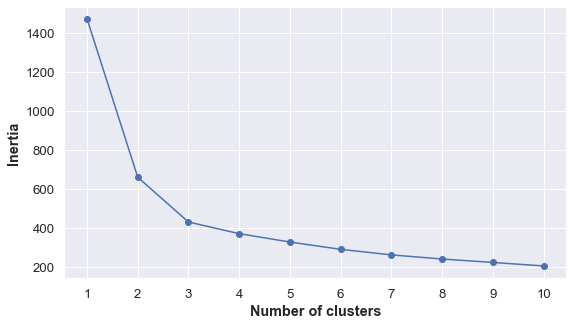

In [50]:
sns.set(font_scale=1.2)
plt.figure(figsize=(9,5))
plt.xlabel('Number of clusters',weight='bold')
plt.ylabel('Inertia',weight='bold')
plt.xticks(range(1,11))
plt.plot(range(1,11), wss,marker='o')
sns.set(font_scale=1)

[0.46560100442748986,
 0.4008059221522216,
 0.3373662527862716,
 0.28660924581898833,
 0.2911469512587151,
 0.2860627461085587,
 0.25668044505857596,
 0.2712023301029524,
 0.24035718477190446]

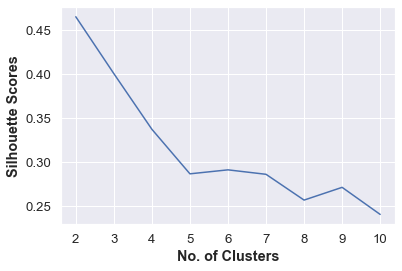

In [51]:
s_s=[]
for i in range(2,11):
    KM = KMeans(n_clusters=i)
    KM.fit(data_scaled)
    s_s.append(silhouette_score(data_scaled,KM.labels_))
display(s_s)

sns.set(font_scale=1.2)
plt.xticks(range(2,11))
plt.ylabel('Silhouette Scores',weight="bold")
plt.xlabel('No. of Clusters',weight="bold")
#plt.title('Silhouette Scores for different clusters',weight="bold")
plt.plot(range(2,11), s_s)
sns.set(font_scale=1)

In [52]:
k_means = KMeans(n_clusters = 3,random_state=0)
k_means.fit(data_scaled)
k_means.labels_

array([2, 1, 2, 0, 2, 0, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2,
       0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 1, 0, 0, 1, 1, 2,
       2, 1, 2, 0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 1, 2, 1,
       2, 0, 1, 2, 1, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 2,
       1, 1, 2, 0, 0, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1,
       1, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 2, 2, 2,
       1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 2, 1, 2, 1, 1, 1])

In [53]:
df['Kmeans Clusters'] = k_means.labels_
df

spending  advance_payments  probability_of_full_payment  current_balance  \
0       19.94             16.92                     0.875200            6.675   
1       15.99             14.89                     0.906400            5.363   
2       18.95             16.42                     0.882900            6.248   
3       10.83             12.96                     0.810588            5.278   
4       17.99             15.86                     0.899200            5.890   
..        ...               ...                          ...              ...   
205     13.89             14.02                     0.888000            5.439   
206     16.77             15.62                     0.863800            5.927   
207     14.03             14.16                     0.879600            5.438   
208     16.12             15.00                     0.900000            5.709   
209     15.57             15.15                     0.852700            5.920   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  \
0           3.763            3.252                         6.550   
1           3.582            3.336                         5.144   
2           3.755            3.368                         6.148   
3           2.641            5.182                         5.185   
4           3.694            2.068                         5.837   
..            ...              ...                           ...   
205         3.199            3.986                         4.738   
206         3.438            4.920                         5.795   
207         3.201            1.717                         5.001   
208         3.485            2.270                         5.443   
209         3.231            2.640                         5.879   

     Ward Clusters  Kmeans Clusters  
0                1                2  
1                3                1  
2                1                2  
3                2                0  
4                1                2  
..             ...              ...  
205              3                1  
206              1                2  
207              3                1  
208              1                1  
209              3                1  

[210 rows x 9 columns]

In [54]:
silhouette_score(data_scaled,k_means.labels_)

0.4008059221522216

In [55]:
from sklearn.metrics import silhouette_samples
sil_width = silhouette_samples(data_scaled,k_means.labels_)
df["sil_width"] = sil_width
df

spending  advance_payments  probability_of_full_payment  current_balance  \
0       19.94             16.92                     0.875200            6.675   
1       15.99             14.89                     0.906400            5.363   
2       18.95             16.42                     0.882900            6.248   
3       10.83             12.96                     0.810588            5.278   
4       17.99             15.86                     0.899200            5.890   
..        ...               ...                          ...              ...   
205     13.89             14.02                     0.888000            5.439   
206     16.77             15.62                     0.863800            5.927   
207     14.03             14.16                     0.879600            5.438   
208     16.12             15.00                     0.900000            5.709   
209     15.57             15.15                     0.852700            5.920   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  \
0           3.763            3.252                         6.550   
1           3.582            3.336                         5.144   
2           3.755            3.368                         6.148   
3           2.641            5.182                         5.185   
4           3.694            2.068                         5.837   
..            ...              ...                           ...   
205         3.199            3.986                         4.738   
206         3.438            4.920                         5.795   
207         3.201            1.717                         5.001   
208         3.485            2.270                         5.443   
209         3.231            2.640                         5.879   

     Ward Clusters  Kmeans Clusters  sil_width  
0                1                2   0.573278  
1                3                1   0.365564  
2                1                2   0.637092  
3                2                0   0.515595  
4                1                2   0.360972  
..             ...              ...        ...  
205              3                1   0.308036  
206              1                2   0.267423  
207              3                1   0.505922  
208              1                1   0.257174  
209              3                1   0.042063  

[210 rows x 10 columns]

In [56]:
silhouette_samples(data_scaled,k_means.labels_).min()

0.0027685411286160638

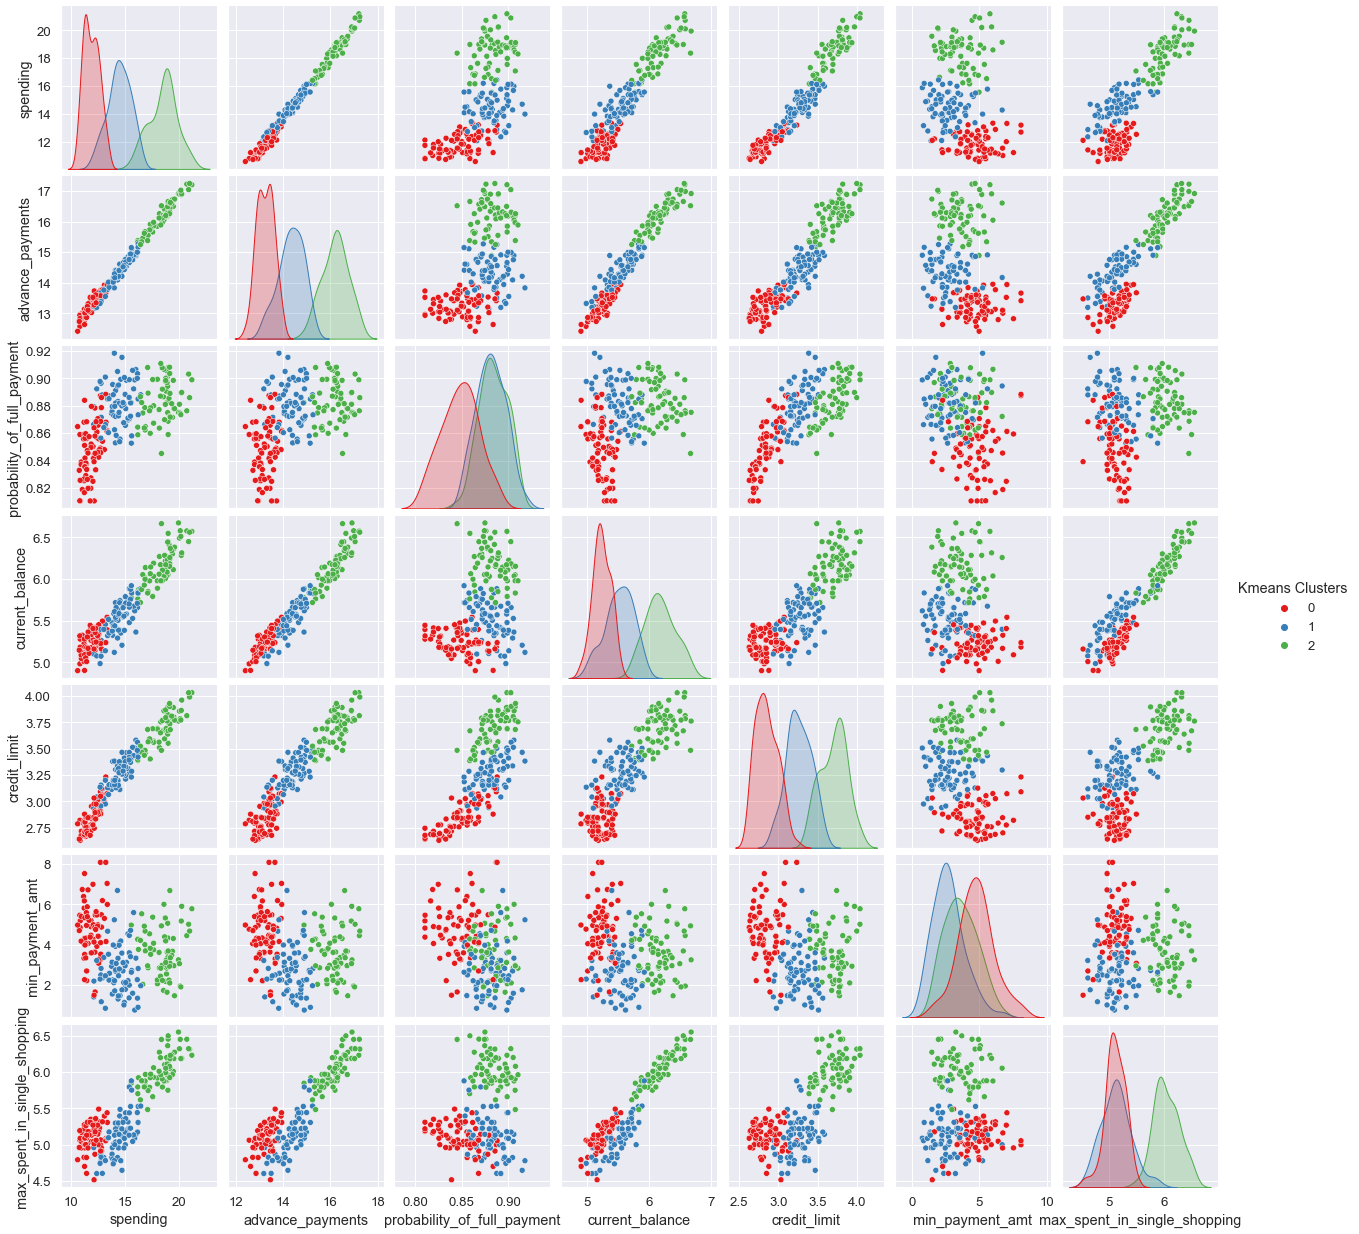

In [57]:
sns.set(font_scale=1.2)
sns.pairplot(df.drop(['Ward Clusters','sil_width'],axis=1),hue='Kmeans Clusters',palette="Set1").savefig('out2.jpg');
sns.set(font_scale=1)

In [58]:
df[df['Kmeans Clusters']==0]

spending  advance_payments  probability_of_full_payment  current_balance  \
3       10.83             12.96                     0.810588            5.278   
5       12.70             13.41                     0.887400            5.183   
6       12.02             13.33                     0.850300            5.350   
9       11.23             12.88                     0.851100            5.140   
12      12.15             13.45                     0.844300            5.417   
..        ...               ...                          ...              ...   
190     11.23             12.63                     0.884000            4.902   
192     12.26             13.60                     0.833300            5.408   
197     12.30             13.34                     0.868400            5.243   
199     12.01             13.52                     0.824900            5.405   
203     11.55             13.10                     0.845500            5.167   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  \
3           2.641         5.182000                         5.185   
5           3.091         8.079625                         5.000   
6           2.810         4.271000                         5.308   
9           2.795         4.325000                         5.003   
12          2.837         3.638000                         5.338   
..            ...              ...                           ...   
190         2.879         2.269000                         4.703   
192         2.833         4.756000                         5.360   
197         2.974         5.637000                         5.063   
199         2.776         6.992000                         5.270   
203         2.845         6.715000                         4.956   

     Ward Clusters  Kmeans Clusters  sil_width  
3                2                0   0.515595  
5                2                0   0.221525  
6                2                0   0.475295  
9                2                0   0.534439  
12               2                0   0.391778  
..             ...              ...        ...  
190              3                0   0.002769  
192              2                0   0.497434  
197              2                0   0.398505  
199              2                0   0.472906  
203              2                0   0.511653  

[72 rows x 10 columns]

In [59]:
df[df['Kmeans Clusters']==1]

spending  advance_payments  probability_of_full_payment  current_balance  \
1       15.99             14.89                       0.9064            5.363   
7       13.74             14.05                       0.8744            5.482   
11      14.09             14.41                       0.8529            5.717   
14      12.10             13.15                       0.8793            5.105   
16      16.14             14.99                       0.9034            5.658   
..        ...               ...                          ...              ...   
202     14.80             14.52                       0.8823            5.656   
205     13.89             14.02                       0.8880            5.439   
207     14.03             14.16                       0.8796            5.438   
208     16.12             15.00                       0.9000            5.709   
209     15.57             15.15                       0.8527            5.920   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  \
1           3.582            3.336                         5.144   
7           3.114            2.932                         4.825   
11          3.186            3.920                         5.299   
14          2.941            2.201                         5.056   
16          3.562            1.355                         5.175   
..            ...              ...                           ...   
202         3.288            3.112                         5.309   
205         3.199            3.986                         4.738   
207         3.201            1.717                         5.001   
208         3.485            2.270                         5.443   
209         3.231            2.640                         5.879   

     Ward Clusters  Kmeans Clusters  sil_width  
1                3                1   0.365564  
7                3                1   0.360258  
11               3                1   0.128399  
14               3                1   0.112021  
16               3                1   0.337610  
..             ...              ...        ...  
202              3                1   0.517202  
205              3                1   0.308036  
207              3                1   0.505922  
208              1                1   0.257174  
209              3                1   0.042063  

[71 rows x 10 columns]

In [60]:
df[df['Kmeans Clusters']==2]

spending  advance_payments  probability_of_full_payment  current_balance  \
0       19.94             16.92                       0.8752            6.675   
2       18.95             16.42                       0.8829            6.248   
4       17.99             15.86                       0.8992            5.890   
8       18.17             16.26                       0.8637            6.271   
10      18.55             16.22                       0.8865            6.153   
..        ...               ...                          ...              ...   
196     18.76             16.20                       0.8984            6.172   
198     19.18             16.63                       0.8717            6.369   
201     17.08             15.38                       0.9079            5.832   
204     16.41             15.25                       0.8866            5.718   
206     16.77             15.62                       0.8638            5.927   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  \
0           3.763            3.252                         6.550   
2           3.755            3.368                         6.148   
4           3.694            2.068                         5.837   
8           3.512            2.853                         6.273   
10          3.674            1.738                         5.894   
..            ...              ...                           ...   
196         3.796            3.120                         6.053   
198         3.681            3.357                         6.229   
201         3.683            2.956                         5.484   
204         3.525            4.217                         5.618   
206         3.438            4.920                         5.795   

     Ward Clusters  Kmeans Clusters  sil_width  
0                1                2   0.573278  
2                1                2   0.637092  
4                1                2   0.360972  
8                1                2   0.519383  
10               1                2   0.465994  
..             ...              ...        ...  
196              1                2   0.597003  
198              1                2   0.613304  
201              1                2   0.096727  
204              1                2   0.047354  
206              1                2   0.267423  

[67 rows x 10 columns]

In [61]:
df1=df[df['Kmeans Clusters']==0].drop('Ward Clusters',axis=1).describe().T
df1['range']=df1['max']-df1['min']
df1['IQR']=df1['75%']-df1['25%']
df1['CV']=df1['std']/df1['mean']
df1['mode1']=df.mode().T[0]
df1['mode2']=df.mode().T[1]
df1['mode3']=df.mode().T[2]
#df1['mode4']=df.mode().T[3]
round(df1.drop('count',axis=1).rename(columns = {'50%':'median'}),2)

mean   std    min    25%  median    75%    max  \
spending                      11.86  0.71  10.59  11.26   11.82  12.40  13.34   
advance_payments              13.25  0.36  12.41  12.99   13.25  13.48  13.95   
probability_of_full_payment    0.85  0.02   0.81   0.84    0.85   0.86   0.89   
current_balance                5.23  0.14   4.90   5.14    5.22   5.34   5.54   
credit_limit                   2.85  0.14   2.63   2.74    2.84   2.97   3.23   
min_payment_amt                4.73  1.33   1.50   4.03    4.80   5.46   8.08   
max_spent_in_single_shopping   5.10  0.18   4.52   5.00    5.09   5.22   5.49   
Kmeans Clusters                0.00  0.00   0.00   0.00    0.00   0.00   0.00   
sil_width                      0.40  0.16   0.00   0.32    0.46   0.52   0.59   

                              range   IQR    CV  mode1  mode2  mode3  
spending                       2.75  1.14  0.06  11.23  14.11  15.38  
advance_payments               1.54  0.49  0.03  13.47    NaN    NaN  
probability_of_full_payment    0.08  0.03  0.02   0.81   0.88    NaN  
current_balance                0.64  0.20  0.03   5.24   5.40    NaN  
credit_limit                   0.60  0.23  0.05   3.03    NaN    NaN  
min_payment_amt                6.58  1.43  0.28   2.13   2.22   2.70  
max_spent_in_single_shopping   0.97  0.22  0.04   5.00    NaN    NaN  
Kmeans Clusters                0.00  0.00   NaN   0.00    NaN    NaN  
sil_width                      0.59  0.20  0.40   0.00   0.00   0.01

In [62]:
df1=df[df['Kmeans Clusters']==1].drop('Ward Clusters',axis=1).describe().T
df1['range']=df1['max']-df1['min']
df1['IQR']=df1['75%']-df1['25%']
df1['CV']=df1['std']/df1['mean']
df1['mode1']=df.mode().T[0]
df1['mode2']=df.mode().T[1]
df1['mode3']=df.mode().T[2]
#df1['mode4']=df.mode().T[3]
round(df1.drop('count',axis=1).rename(columns = {'50%':'median'}),2)

mean   std    min    25%  median    75%    max  \
spending                      14.44  1.06  12.08  13.82   14.43  15.26  16.44   
advance_payments              14.34  0.53  13.15  14.03   14.39  14.76  15.27   
probability_of_full_payment    0.88  0.02   0.85   0.87    0.88   0.89   0.92   
current_balance                5.51  0.23   4.98   5.38    5.54   5.69   5.92   
credit_limit                   3.26  0.15   2.94   3.16    3.26   3.38   3.58   
min_payment_amt                2.71  1.18   0.77   1.95    2.64   3.33   6.68   
max_spent_in_single_shopping   5.12  0.27   4.61   4.96    5.13   5.26   5.88   
Kmeans Clusters                1.00  0.00   1.00   1.00    1.00   1.00   1.00   
sil_width                      0.34  0.17   0.00   0.23    0.37   0.48   0.55   

                              range   IQR    CV  mode1  mode2  mode3  
spending                       4.36  1.44  0.07  11.23  14.11  15.38  
advance_payments               2.12  0.73  0.04  13.47    NaN    NaN  
probability_of_full_payment    0.07  0.02  0.02   0.81   0.88    NaN  
current_balance                0.94  0.31  0.04   5.24   5.40    NaN  
credit_limit                   0.65  0.22  0.05   3.03    NaN    NaN  
min_payment_amt                5.92  1.38  0.43   2.13   2.22   2.70  
max_spent_in_single_shopping   1.27  0.30  0.05   5.00    NaN    NaN  
Kmeans Clusters                0.00  0.00  0.00   0.00    NaN    NaN  
sil_width                      0.55  0.25  0.49   0.00   0.00   0.01

In [63]:
df1=df[df['Kmeans Clusters']==2].drop('Ward Clusters',axis=1).describe().T
df1['range']=df1['max']-df1['min']
df1['IQR']=df1['75%']-df1['25%']
df1['CV']=df1['std']/df1['mean']
df1['mode1']=df.mode().T[0]
df1['mode2']=df.mode().T[1]
df1['mode3']=df.mode().T[2]
#df1['mode4']=df.mode().T[3]
round(df1.drop('count',axis=1).rename(columns = {'50%':'median'}),2)

mean   std    min    25%  median    75%    max  \
spending                      18.50  1.28  15.56  17.59   18.75  19.14  21.18   
advance_payments              16.20  0.55  14.89  15.86   16.23  16.58  17.25   
probability_of_full_payment    0.88  0.01   0.85   0.87    0.88   0.90   0.91   
current_balance                6.18  0.24   5.72   6.01    6.15   6.33   6.68   
credit_limit                   3.70  0.17   3.39   3.56    3.72   3.81   4.03   
min_payment_amt                3.63  1.21   1.47   2.85    3.62   4.42   6.68   
max_spent_in_single_shopping   6.04  0.23   5.48   5.88    6.01   6.19   6.55   
Kmeans Clusters                2.00  0.00   2.00   2.00    2.00   2.00   2.00   
sil_width                      0.47  0.15   0.03   0.42    0.52   0.57   0.64   

                              range   IQR    CV  mode1  mode2  mode3  
spending                       5.62  1.55  0.07  11.23  14.11  15.38  
advance_payments               2.36  0.72  0.03  13.47    NaN    NaN  
probability_of_full_payment    0.07  0.02  0.02   0.81   0.88    NaN  
current_balance                0.96  0.32  0.04   5.24   5.40    NaN  
credit_limit                   0.65  0.24  0.04   3.03    NaN    NaN  
min_payment_amt                5.21  1.57  0.33   2.13   2.22   2.70  
max_spent_in_single_shopping   1.07  0.31  0.04   5.00    NaN    NaN  
Kmeans Clusters                0.00  0.00  0.00   0.00    NaN    NaN  
sil_width                      0.61  0.15  0.33   0.00   0.00   0.01

In [64]:
round(pd.pivot_table(df.drop(['Ward Clusters','sil_width'],axis=1),index='Kmeans Clusters',aggfunc=np.mean),2)

advance_payments  credit_limit  current_balance  \
Kmeans Clusters                                                    
0                           13.25          2.85             5.23   
1                           14.34          3.26             5.51   
2                           16.20          3.70             6.18   

                 max_spent_in_single_shopping  min_payment_amt  \
Kmeans Clusters                                                  
0                                        5.10             4.73   
1                                        5.12             2.71   
2                                        6.04             3.63   

                 probability_of_full_payment  spending  
Kmeans Clusters                                         
0                                       0.85     11.86  
1                                       0.88     14.44  
2                                       0.88     18.50

In [65]:
pd.DataFrame(k_means.cluster_centers_,columns=df.drop(['Ward Clusters','sil_width','Kmeans Clusters'],axis=1).columns)

spending  advance_payments  probability_of_full_payment  current_balance  \
0 -1.030253         -1.006649                    -0.965588        -0.897685   
1 -0.141119         -0.170043                     0.449804        -0.257814   
2  1.256682          1.261966                     0.560989         1.237883   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  
0     -1.085583         0.695182                     -0.624809  
1      0.001647        -0.663892                     -0.585893  
2      1.164852        -0.043534                      1.292308

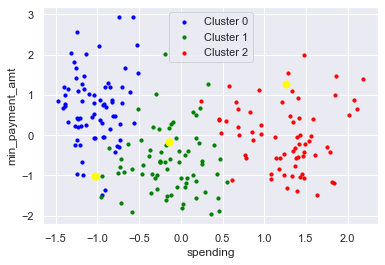

In [66]:
data_scaled['Kmeans Clusters'] = k_means.labels_
cluster0=data_scaled[data_scaled['Kmeans Clusters']==0]
cluster1=data_scaled[data_scaled['Kmeans Clusters']==1]
cluster2=data_scaled[data_scaled['Kmeans Clusters']==2]

plt.scatter(cluster0['spending'], cluster0['min_payment_amt'], s=10, c='blue', label ='Cluster 0')
plt.scatter(cluster1['spending'], cluster1['min_payment_amt'], s=10, c='green', label ='Cluster 1')
plt.scatter(cluster2['spending'], cluster2['min_payment_amt'], s=10, c='red', label ='Cluster 2')
plt.xlabel('spending')
plt.ylabel('min_payment_amt')
plt.legend()
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')
plt.show()



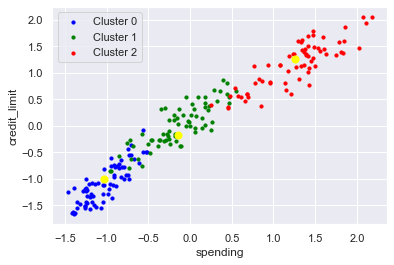

In [67]:
plt.scatter(cluster0['spending'], cluster0['credit_limit'], s=10, c='blue', label ='Cluster 0')
plt.scatter(cluster1['spending'], cluster1['credit_limit'], s=10, c='green', label ='Cluster 1')
plt.scatter(cluster2['spending'], cluster2['credit_limit'], s=10, c='red', label ='Cluster 2')
plt.xlabel('spending')
plt.ylabel('credit_limit')
plt.legend()
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')
plt.show()

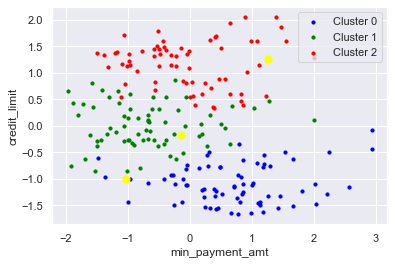

In [68]:
plt.scatter(cluster0['min_payment_amt'], cluster0['credit_limit'], s=10, c='blue', label ='Cluster 0')
plt.scatter(cluster1['min_payment_amt'], cluster1['credit_limit'], s=10, c='green', label ='Cluster 1')
plt.scatter(cluster2['min_payment_amt'], cluster2['credit_limit'], s=10, c='red', label ='Cluster 2')
plt.xlabel('min_payment_amt')
plt.ylabel('credit_limit')
plt.legend()
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')
plt.show()

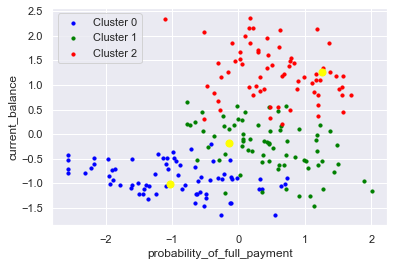

In [69]:
plt.scatter(cluster0['probability_of_full_payment'], cluster0['current_balance'], s=10, c='blue', label ='Cluster 0')
plt.scatter(cluster1['probability_of_full_payment'], cluster1['current_balance'], s=10, c='green', label ='Cluster 1')
plt.scatter(cluster2['probability_of_full_payment'], cluster2['current_balance'], s=10, c='red', label ='Cluster 2')
plt.xlabel('probability_of_full_payment')
plt.ylabel('current_balance')
plt.legend()
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')
plt.show()

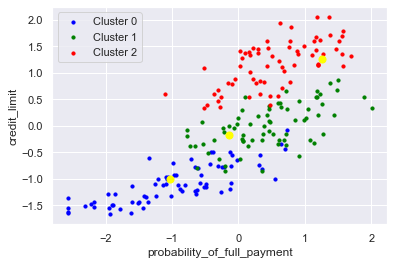

In [70]:
plt.scatter(cluster0['probability_of_full_payment'], cluster0['credit_limit'], s=10, c='blue', label ='Cluster 0')
plt.scatter(cluster1['probability_of_full_payment'], cluster1['credit_limit'], s=10, c='green', label ='Cluster 1')
plt.scatter(cluster2['probability_of_full_payment'], cluster2['credit_limit'], s=10, c='red', label ='Cluster 2')
plt.xlabel('probability_of_full_payment')
plt.ylabel('credit_limit')
plt.legend()
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')
plt.show()

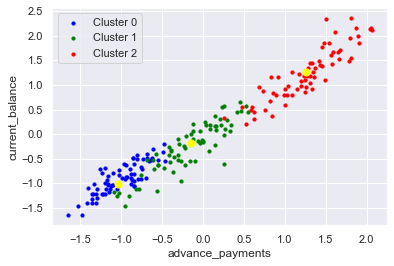

In [71]:
plt.scatter(cluster0['advance_payments'], cluster0['current_balance'], s=10, c='blue', label ='Cluster 0')
plt.scatter(cluster1['advance_payments'], cluster1['current_balance'], s=10, c='green', label ='Cluster 1')
plt.scatter(cluster2['advance_payments'], cluster2['current_balance'], s=10, c='red', label ='Cluster 2')
plt.xlabel('advance_payments')
plt.ylabel('current_balance')
plt.legend()
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')
plt.show()

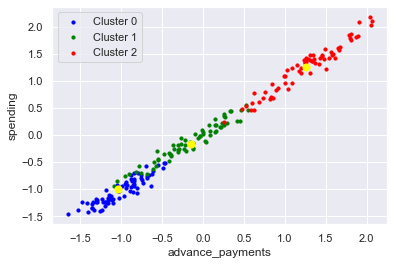

In [72]:
plt.scatter(cluster0['advance_payments'], cluster0['spending'], s=10, c='blue', label ='Cluster 0')
plt.scatter(cluster1['advance_payments'], cluster1['spending'], s=10, c='green', label ='Cluster 1')
plt.scatter(cluster2['advance_payments'], cluster2['spending'], s=10, c='red', label ='Cluster 2')
plt.xlabel('advance_payments')
plt.ylabel('spending')
plt.legend()
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')
plt.show()

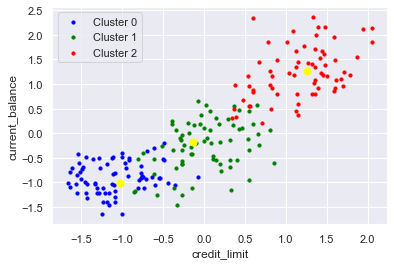

In [73]:
plt.scatter(cluster0['credit_limit'], cluster0['current_balance'], s=10, c='blue', label ='Cluster 0')
plt.scatter(cluster1['credit_limit'], cluster1['current_balance'], s=10, c='green', label ='Cluster 1')
plt.scatter(cluster2['credit_limit'], cluster2['current_balance'], s=10, c='red', label ='Cluster 2')
plt.xlabel('credit_limit')
plt.ylabel('current_balance')
plt.legend()
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')
plt.show()

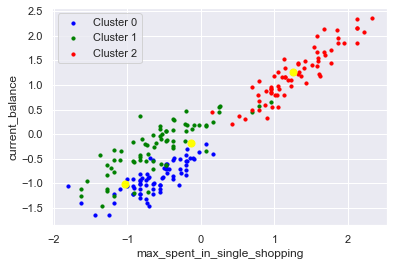

In [74]:
plt.scatter(cluster0['max_spent_in_single_shopping'], cluster0['current_balance'], s=10, c='blue', label ='Cluster 0')
plt.scatter(cluster1['max_spent_in_single_shopping'], cluster1['current_balance'], s=10, c='green', label ='Cluster 1')
plt.scatter(cluster2['max_spent_in_single_shopping'], cluster2['current_balance'], s=10, c='red', label ='Cluster 2')
plt.xlabel('max_spent_in_single_shopping')
plt.ylabel('current_balance')
plt.legend()
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')
plt.show()

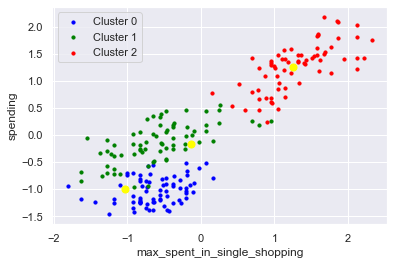

In [75]:
plt.scatter(cluster0['max_spent_in_single_shopping'], cluster0['spending'], s=10, c='blue', label ='Cluster 0')
plt.scatter(cluster1['max_spent_in_single_shopping'], cluster1['spending'], s=10, c='green', label ='Cluster 1')
plt.scatter(cluster2['max_spent_in_single_shopping'], cluster2['spending'], s=10, c='red', label ='Cluster 2')
plt.xlabel('max_spent_in_single_shopping')
plt.ylabel('spending')
plt.legend()
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')
plt.show()

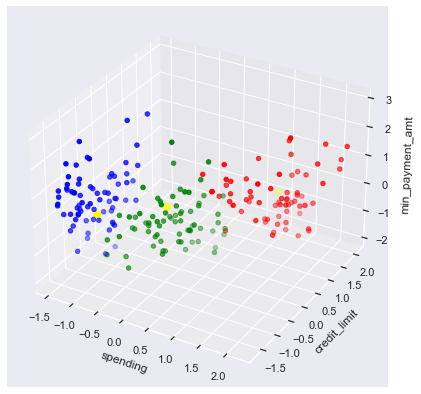

In [76]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(cluster0['spending'], cluster0['credit_limit'], cluster0['min_payment_amt'],color='blue')
ax.scatter3D(cluster1['spending'], cluster1['credit_limit'], cluster1['min_payment_amt'],color='green')
ax.scatter3D(cluster2['spending'], cluster2['credit_limit'], cluster2['min_payment_amt'],color='red')

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')

ax.set_xlabel('spending')
ax.set_ylabel('credit_limit')
ax.set_zlabel('min_payment_amt')

# show plot
plt.show()

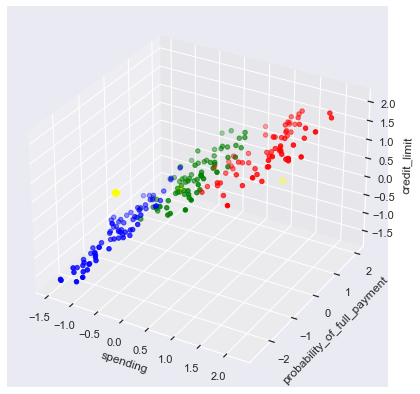

In [77]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(cluster0['spending'], cluster0['probability_of_full_payment'], cluster0['credit_limit'],color='blue')
ax.scatter3D(cluster1['spending'], cluster1['probability_of_full_payment'], cluster1['credit_limit'],color='green')
ax.scatter3D(cluster2['spending'], cluster2['probability_of_full_payment'], cluster2['credit_limit'],color='red')

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')

ax.set_xlabel('spending')
ax.set_ylabel('probability_of_full_payment')
ax.set_zlabel('credit_limit')

# show plot
plt.show()

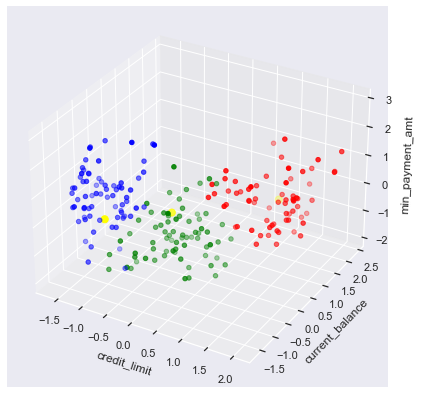

In [78]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(cluster0['credit_limit'], cluster0['current_balance'], cluster0['min_payment_amt'],color='blue')
ax.scatter3D(cluster1['credit_limit'], cluster1['current_balance'], cluster1['min_payment_amt'],color='green')
ax.scatter3D(cluster2['credit_limit'], cluster2['current_balance'], cluster2['min_payment_amt'],color='red')

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')

ax.set_xlabel('credit_limit')
ax.set_ylabel('current_balance')
ax.set_zlabel('min_payment_amt')

# show plot
plt.show()

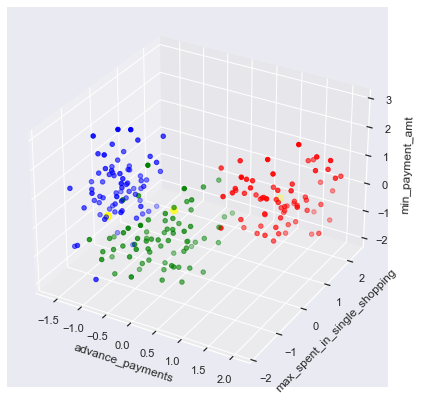

In [79]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(cluster0['advance_payments'], cluster0['max_spent_in_single_shopping'], cluster0['min_payment_amt'],color='blue')
ax.scatter3D(cluster1['advance_payments'], cluster1['max_spent_in_single_shopping'], cluster1['min_payment_amt'],color='green')
ax.scatter3D(cluster2['advance_payments'], cluster2['max_spent_in_single_shopping'], cluster2['min_payment_amt'],color='red')

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')

ax.set_xlabel('advance_payments')
ax.set_ylabel('max_spent_in_single_shopping')
ax.set_zlabel('min_payment_amt')

# show plot
plt.show()

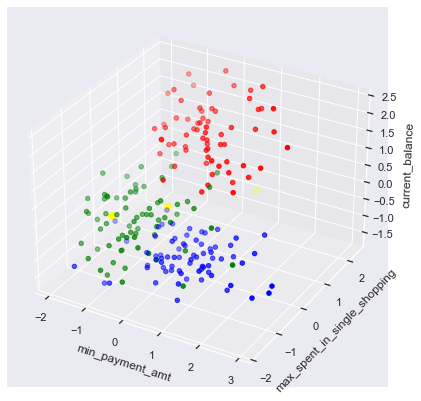

In [80]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(cluster0['min_payment_amt'], cluster0['max_spent_in_single_shopping'], cluster0['current_balance'],color='blue')
ax.scatter3D(cluster1['min_payment_amt'], cluster1['max_spent_in_single_shopping'], cluster1['current_balance'],color='green')
ax.scatter3D(cluster2['min_payment_amt'], cluster2['max_spent_in_single_shopping'], cluster2['current_balance'],color='red')

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')

ax.set_xlabel('min_payment_amt')
ax.set_ylabel('max_spent_in_single_shopping')
ax.set_zlabel('current_balance')

# show plot
plt.show()

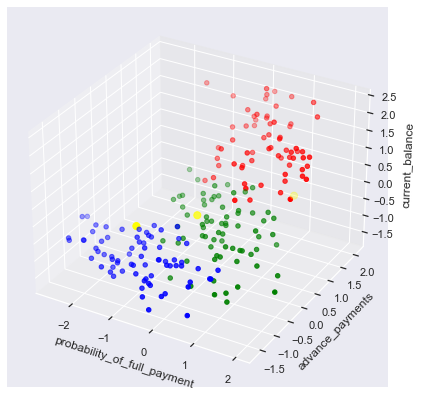

In [81]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(cluster0['probability_of_full_payment'], cluster0['advance_payments'], cluster0['current_balance'],color='blue')
ax.scatter3D(cluster1['probability_of_full_payment'], cluster1['advance_payments'], cluster1['current_balance'],color='green')
ax.scatter3D(cluster2['probability_of_full_payment'], cluster2['advance_payments'], cluster2['current_balance'],color='red')

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')

ax.set_xlabel('probability_of_full_payment')
ax.set_ylabel('advance_payments')
ax.set_zlabel('current_balance')

# show plot
plt.show()

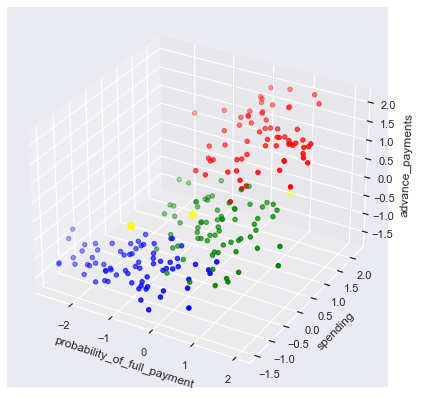

In [82]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(cluster0['probability_of_full_payment'], cluster0['spending'], cluster0['advance_payments'],color='blue')
ax.scatter3D(cluster1['probability_of_full_payment'], cluster1['spending'], cluster1['advance_payments'],color='green')
ax.scatter3D(cluster2['probability_of_full_payment'], cluster2['spending'], cluster2['advance_payments'],color='red')

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')

ax.set_xlabel('probability_of_full_payment')
ax.set_ylabel('spending')
ax.set_zlabel('advance_payments')

# show plot
plt.show()

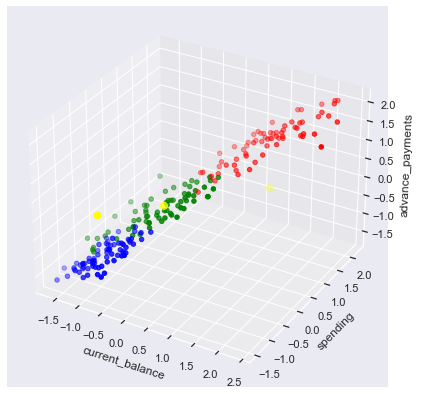

In [83]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(cluster0['current_balance'], cluster0['spending'], cluster0['advance_payments'],color='blue')
ax.scatter3D(cluster1['current_balance'], cluster1['spending'], cluster1['advance_payments'],color='green')
ax.scatter3D(cluster2['current_balance'], cluster2['spending'], cluster2['advance_payments'],color='red')

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')

ax.set_xlabel('current_balance')
ax.set_ylabel('spending')
ax.set_zlabel('advance_payments')

# show plot
plt.show()

# Problem 2

In [84]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [187]:
df=pd.read_csv('insurance_part2_data-2.csv')

In [86]:
df.head()

Age Agency_Code           Type Claimed  Commision Channel  Duration  Sales  \
0   48         C2B       Airlines      No       0.70  Online         7   2.51   
1   36         EPX  Travel Agency      No       0.00  Online        34  20.00   
2   39         CWT  Travel Agency      No       5.94  Online         3   9.90   
3   36         EPX  Travel Agency      No       0.00  Online         4  26.00   
4   33         JZI       Airlines      No       6.30  Online        53  18.00   

        Product Name Destination  
0    Customised Plan        ASIA  
1    Customised Plan        ASIA  
2    Customised Plan    Americas  
3  Cancellation Plan        ASIA  
4        Bronze Plan        ASIA

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [88]:
df.shape

(3000, 10)

In [89]:
df.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

In [90]:
df1=df.describe().T
df1['range']=df1['max']-df1['min']
df1['IQR']=df1['75%']-df1['25%']
df1['CV']=df1['std']/df1['mean']
df1['mode']=df.mode().T[0]
#df1['mode2']=df.mode().T[1]
#df1['mode3']=df.mode().T[2]
#df1['mode4']=df.mode().T[3]
df1['d-type']=df.dtypes
round(df1.drop('count',axis=1).rename(columns = {'50%':'median'}),2)

mean     std  min   25%  median    75%      max    range    IQR  \
Age        38.09   10.46  8.0  32.0   36.00  42.00    84.00    76.00  10.00   
Commision  14.53   25.48  0.0   0.0    4.63  17.24   210.21   210.21  17.24   
Duration   70.00  134.05 -1.0  11.0   26.50  63.00  4580.00  4581.00  52.00   
Sales      60.25   70.73  0.0  20.0   33.00  69.00   539.00   539.00  49.00   

             CV  mode   d-type  
Age        0.27    36    int64  
Commision  1.75   0.0  float64  
Duration   1.92     8    int64  
Sales      1.17  20.0  float64

In [91]:
df.describe(include='object')

Agency_Code           Type Claimed Channel     Product Name Destination
count         3000           3000    3000    3000             3000        3000
unique           4              2       2       2                5           3
top            EPX  Travel Agency      No  Online  Customised Plan        ASIA
freq          1365           1837    2076    2954             1136        2465

In [92]:
df.isnull().sum().sum()

0

In [93]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 139


In [94]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("--------------------------------")
    print(df[column].describe(),end=' ')
    
    
    print("\n\nDistribution of " + column)
    print("-------------------------------------")
    sns.displot(df[column], kde=1, color='m',bins=nbins);
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("------------------------------")
    ax = sns.boxplot(x=df[column],color='y');
    plt.show()


Description of Age
--------------------------------
count    3000.000000
mean       38.091000
std        10.463518
min         8.000000
25%        32.000000
50%        36.000000
75%        42.000000
max        84.000000
Name: Age, dtype: float64 

Distribution of Age
-------------------------------------


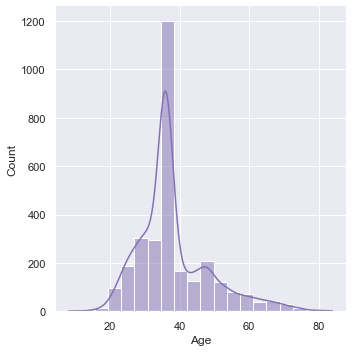

BoxPlot of Age
------------------------------


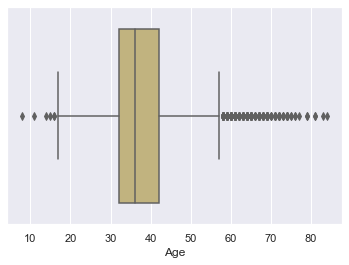

Description of Commision
--------------------------------
count    3000.000000
mean       14.529203
std        25.481455
min         0.000000
25%         0.000000
50%         4.630000
75%        17.235000
max       210.210000
Name: Commision, dtype: float64 

Distribution of Commision
-------------------------------------


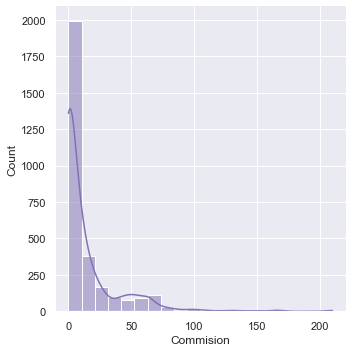

BoxPlot of Commision
------------------------------


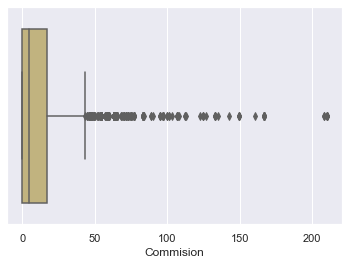

Description of Duration
--------------------------------
count    3000.000000
mean       70.001333
std       134.053313
min        -1.000000
25%        11.000000
50%        26.500000
75%        63.000000
max      4580.000000
Name: Duration, dtype: float64 

Distribution of Duration
-------------------------------------


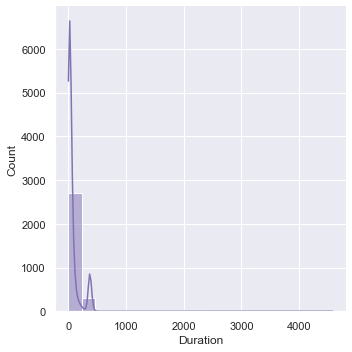

BoxPlot of Duration
------------------------------


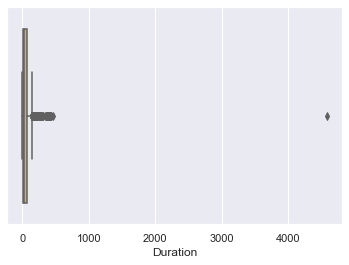

Description of Sales
--------------------------------
count    3000.000000
mean       60.249913
std        70.733954
min         0.000000
25%        20.000000
50%        33.000000
75%        69.000000
max       539.000000
Name: Sales, dtype: float64 

Distribution of Sales
-------------------------------------


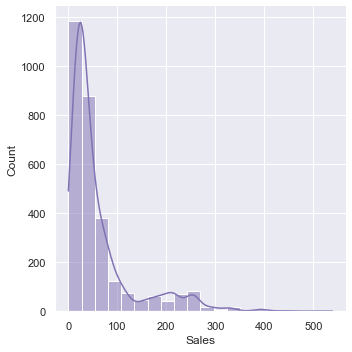

BoxPlot of Sales
------------------------------


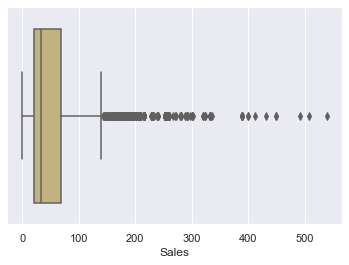

In [95]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
lstcolumns = list(df.select_dtypes(include=numerics).columns.values)
for x in lstcolumns:
    univariateAnalysis_numeric(x,20)

In [96]:
for column in df.columns: 
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique(),'unique values')
        print('--------------------')
        print(df[column].value_counts())
        print('\n',column.upper(),'(normalized)')
        print('--------------------')
        print(df[column].value_counts(normalize=1))
        print('\n*************************************************\n\n')

AGENCY_CODE :  4 unique values
--------------------
EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64

 AGENCY_CODE (normalized)
--------------------
EPX    0.455000
C2B    0.308000
CWT    0.157333
JZI    0.079667
Name: Agency_Code, dtype: float64

*************************************************


TYPE :  2 unique values
--------------------
Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64

 TYPE (normalized)
--------------------
Travel Agency    0.612333
Airlines         0.387667
Name: Type, dtype: float64

*************************************************


CLAIMED :  2 unique values
--------------------
No     2076
Yes     924
Name: Claimed, dtype: int64

 CLAIMED (normalized)
--------------------
No     0.692
Yes    0.308
Name: Claimed, dtype: float64

*************************************************


CHANNEL :  2 unique values
--------------------
Online     2954
Offline      46
Name: Channel, dtype: int64

 CHANNEL (normalized

In [97]:
for column in df.columns: 
    if df[column].dtype == 'object':
        print(column.upper(),'contains ?: ',(df[column] == '?').sum())
        print(column.upper(),'contains *: ',(df[column] == '*').sum())
        print(column.upper(),'contains %: ',(df[column] == '%').sum())
        print(column.upper(),'contains &: ',(df[column] == '&').sum())
        print('\n*********************************\n')

AGENCY_CODE contains ?:  0
AGENCY_CODE contains *:  0
AGENCY_CODE contains %:  0
AGENCY_CODE contains &:  0

*********************************

TYPE contains ?:  0
TYPE contains *:  0
TYPE contains %:  0
TYPE contains &:  0

*********************************

CLAIMED contains ?:  0
CLAIMED contains *:  0
CLAIMED contains %:  0
CLAIMED contains &:  0

*********************************

CHANNEL contains ?:  0
CHANNEL contains *:  0
CHANNEL contains %:  0
CHANNEL contains &:  0

*********************************

PRODUCT NAME contains ?:  0
PRODUCT NAME contains *:  0
PRODUCT NAME contains %:  0
PRODUCT NAME contains &:  0

*********************************

DESTINATION contains ?:  0
DESTINATION contains *:  0
DESTINATION contains %:  0
DESTINATION contains &:  0

*********************************



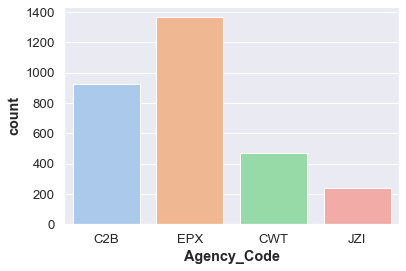

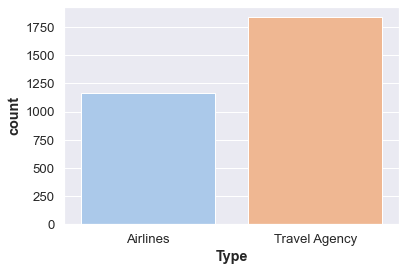

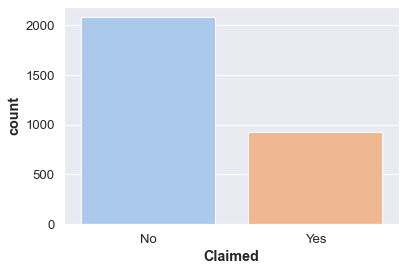

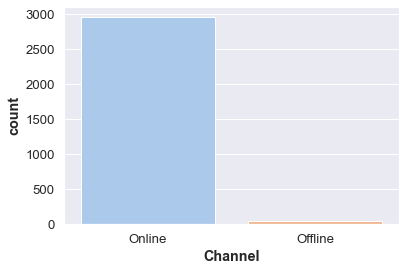

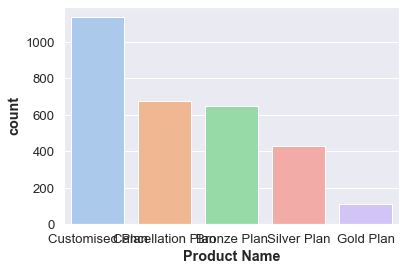

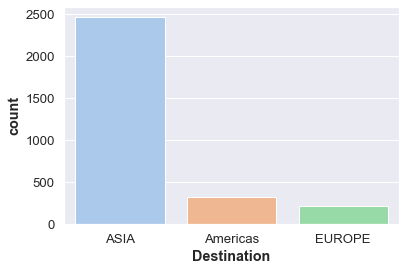

In [98]:
sns.set(font_scale=1.2)
for column in df.columns: 
    if df[column].dtype == 'object':
        sns.countplot(x=column, data=df, palette='pastel')
        plt.ylabel('count',weight="bold")
        plt.xlabel(column,weight="bold")
        plt.show()
sns.set(font_scale=1)

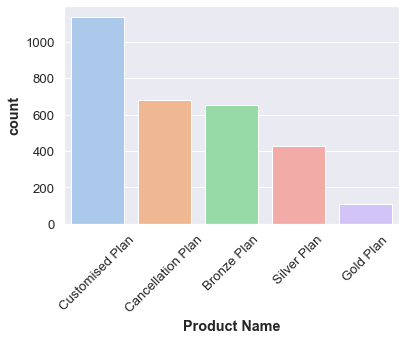

In [99]:
sns.set(font_scale=1.2)
sns.countplot(x='Product Name', data=df, palette='pastel');
plt.ylabel('count',weight="bold")
plt.xlabel('Product Name',weight="bold")
plt.xticks(rotation=45)
plt.show()
sns.set(font_scale=1)

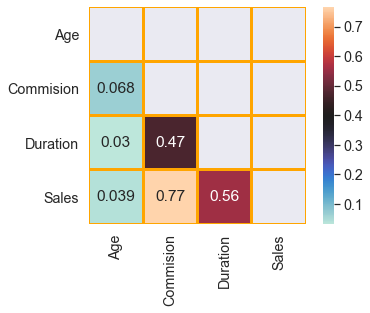

In [100]:
#plt.figure(figsize=(8,8))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.set(font_scale=1.3)
sns.heatmap(df.corr(),cmap="icefire",annot=True,linewidths=2,
                linecolor='orange',square=True,mask=mask);
sns.set(font_scale=1)

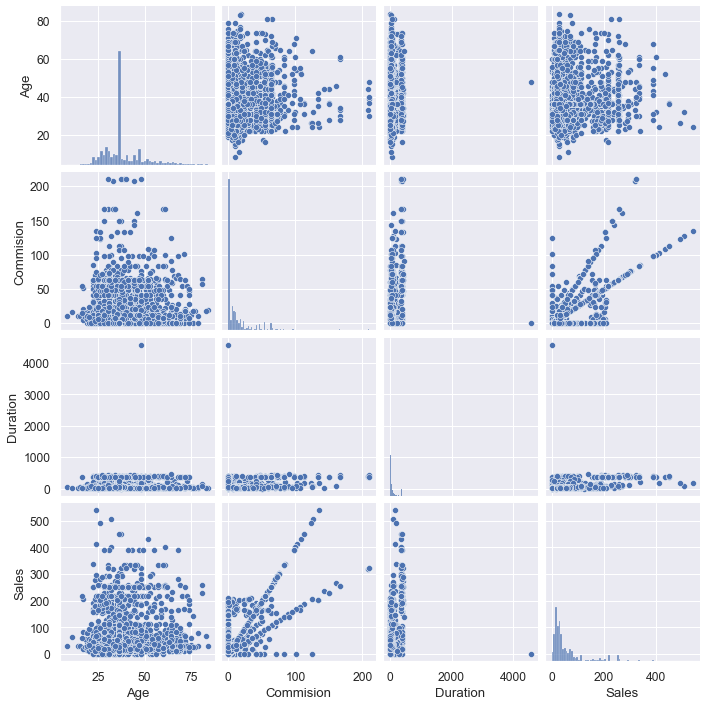

In [101]:
sns.set(font_scale=1.1)
sns.pairplot(df).savefig('out.jpg')
sns.set(font_scale=1)

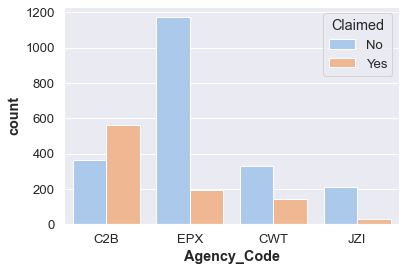

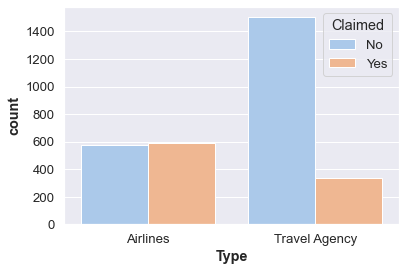

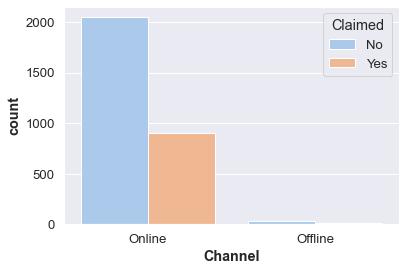

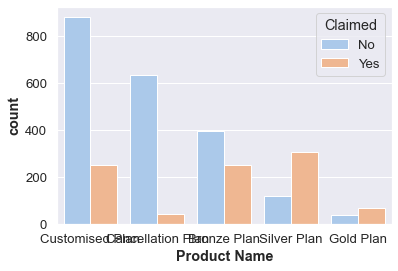

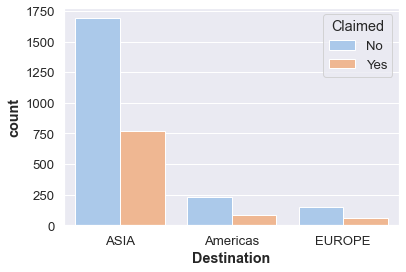

In [102]:
sns.set(font_scale=1.2)
for column in df.drop('Claimed',axis=1).columns: 
    if df[column].dtype == 'object':
        sns.countplot(x=column, data=df, hue='Claimed', palette='pastel')
        plt.ylabel('count',weight="bold")
        plt.xlabel(column,weight="bold")
        plt.show()
sns.set(font_scale=1)

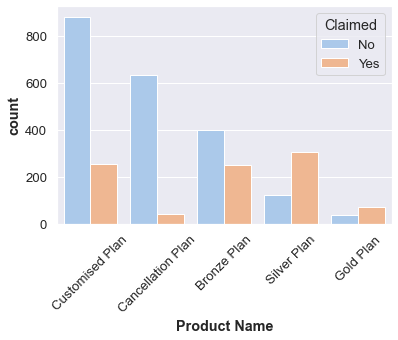

In [103]:
sns.set(font_scale=1.2)
sns.countplot(x='Product Name', data=df, hue='Claimed', palette='pastel')
plt.ylabel('count',weight="bold")
plt.xlabel('Product Name',weight="bold")
plt.xticks(rotation=45)
plt.show()
sns.set(font_scale=1)

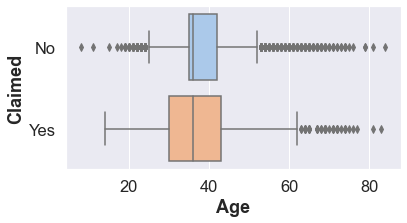

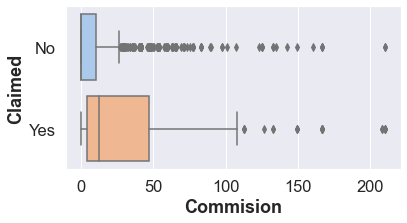

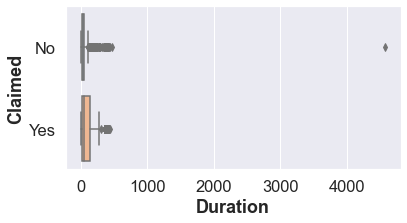

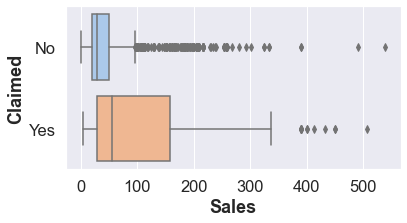

In [198]:
sns.set(font_scale=1.5)
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
lstcolumns = list(df.select_dtypes(include=numerics).columns.values)
for val in lstcolumns:
        plt.figure(figsize=(6,3))
        sns.boxplot(x=val, y='Claimed', data=df, palette='pastel',orient='h')
        plt.xlabel(val,weight="bold")
        plt.ylabel('Claimed',weight="bold")
        plt.show()
sns.set(font_scale=1)

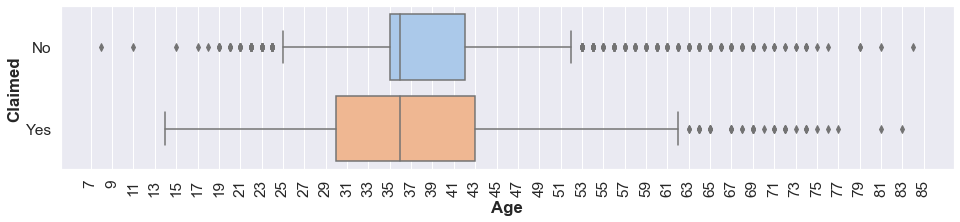

In [212]:
sns.set(font_scale=1.4)
plt.figure(figsize=(16,3))
sns.boxplot(x='Age', y='Claimed', data=df, palette='pastel',orient='h');
plt.xlabel('Age',weight="bold")
plt.ylabel('Claimed',weight="bold")
plt.xticks(range(7,86,2),rotation=90)
plt.show()
sns.set(font_scale=1)

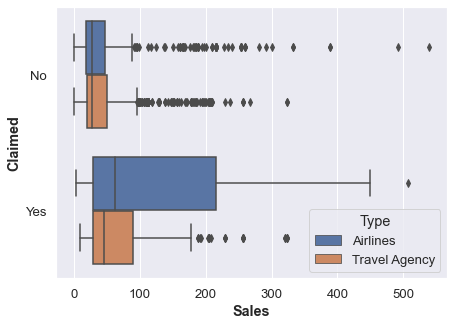

In [105]:
sns.set(font_scale=1.2)
plt.figure(figsize=(7,5))
sns.boxplot(y='Claimed', x='Sales', hue='Type',data=df,orient='h',);
plt.xlabel('Sales',weight="bold")
plt.ylabel('Claimed',weight="bold")
sns.set(font_scale=1)

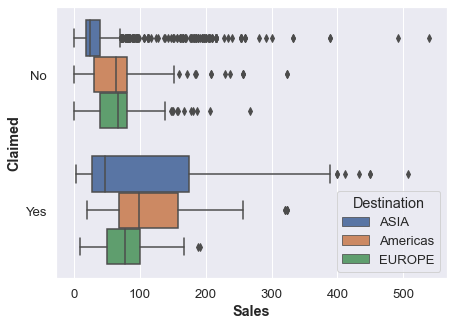

In [213]:
sns.set(font_scale=1.2)
plt.figure(figsize=(7,5))
sns.boxplot(y='Claimed', x='Sales', hue='Destination',data=df,orient='h',);
plt.xlabel('Sales',weight="bold")
plt.ylabel('Claimed',weight="bold")
sns.set(font_scale=1)

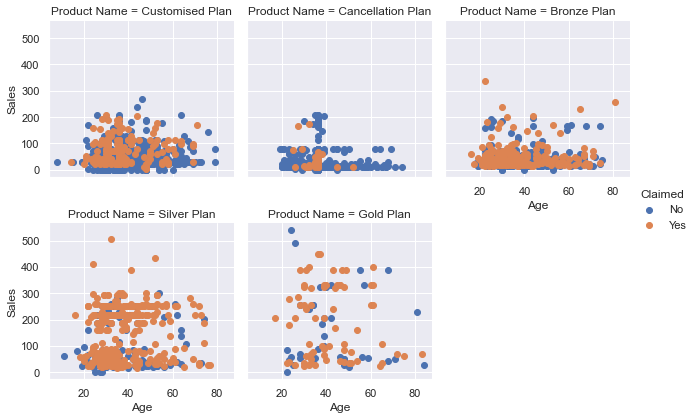

In [107]:
#sns.set(font_scale=1.3)
g = sns.FacetGrid(df, col="Product Name", hue='Claimed',col_wrap=3, height=3)
g = g.map(plt.scatter, "Age", 'Sales')
g.add_legend()
sns.set(font_scale=1)

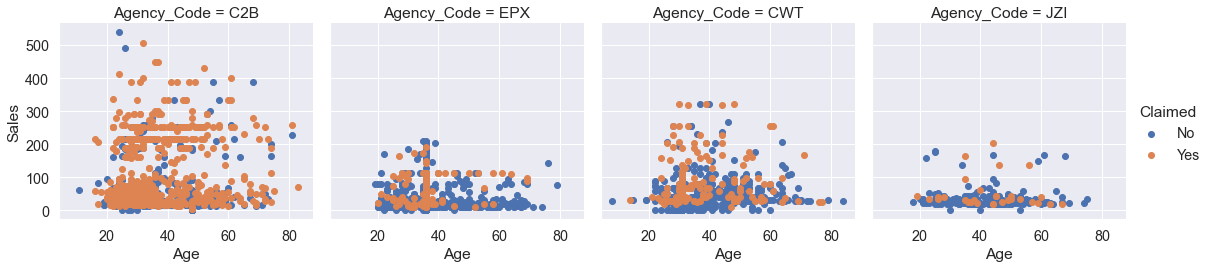

In [108]:
sns.set(font_scale=1.3)
g = sns.FacetGrid(df, col="Agency_Code", hue='Claimed',col_wrap=4, height=4)
g = g.map(plt.scatter, "Age", 'Sales')
g.add_legend()
sns.set(font_scale=1)

In [109]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('For feature "',feature,'":')
        print(sorted(pd.Categorical(df[feature].unique())))
        print(sorted(pd.Categorical(df[feature].unique()).codes))
        df[feature]=pd.Categorical(df[feature]).codes



For feature " Agency_Code ":
['C2B', 'CWT', 'EPX', 'JZI']
[0, 1, 2, 3]


For feature " Type ":
['Airlines', 'Travel Agency']
[0, 1]


For feature " Claimed ":
['No', 'Yes']
[0, 1]


For feature " Channel ":
['Offline', 'Online']
[0, 1]


For feature " Product Name ":
['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[0, 1, 2, 3, 4]


For feature " Destination ":
['ASIA', 'Americas', 'EUROPE']
[0, 1, 2]


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [111]:
print('Before Removing: ',df.shape)
df=df.drop(["Channel"],axis=1) 
print('After Removing: ',df.shape)

Before Removing:  (3000, 10)
After Removing:  (3000, 9)


In [112]:
df['Claimed'].value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

In [113]:
X = df.drop('Claimed', axis=1)

y = df.pop('Claimed')

## Splitting data into training and test set

**Tried executing the entire code for 'test_size=.20' and 'test_size=.30'.**

**'test_size=.20' gave better performance metrics for all models.**

In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.20, random_state=1)

## Checking the dimensions of the training and test data

In [115]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('train_labels:',train_labels.shape)
print('test_labels:',test_labels.shape)

X_train: (2400, 8)
X_test: (600, 8)
train_labels: (2400,)
test_labels: (600,)


# Building a Decision Tree Classifier

In [116]:
param_grid = {
    'criterion': ['gini'],  #'entropy'
    'max_depth': [6],   # 7,8,9,10,11,12,13,14,20,25
    'min_samples_leaf': [25],   # 100,150
    'min_samples_split': [300],   # 100,50,150,450
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10, scoring='recall')

In [117]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid
#{'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 25, 'min_samples_split': 300}


DecisionTreeClassifier(max_depth=6, min_samples_leaf=25, min_samples_split=300,
                       random_state=1)

## Generating Tree

In [118]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

http://webgraphviz.com/

## Variable Importance

In [119]:
print(
    pd.DataFrame(best_grid.feature_importances_,
                 columns=["Imp"],
                 index=X_train.columns).sort_values('Imp', ascending=False))

                   Imp
Agency_Code   0.609733
Sales         0.216365
Product Name  0.093596
Commision     0.043312
Duration      0.025407
Age           0.011588
Type          0.000000
Destination   0.000000


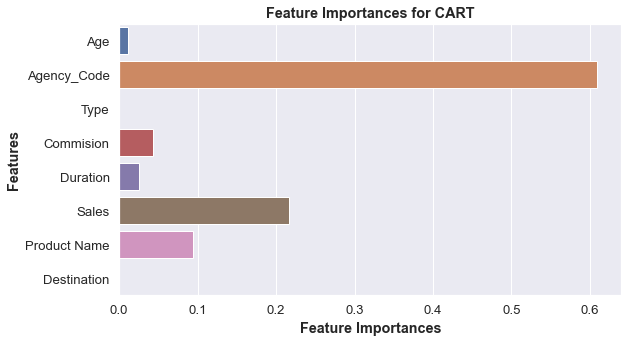

In [120]:
sns.set(font_scale=1.2)
plt.figure(figsize=(9,5))
plt.xlabel('Feature Importances',weight='bold')
plt.ylabel('Features',weight='bold')
plt.title('Feature Importances for CART',weight='bold')
sns.barplot(y=X_train.columns,x=best_grid.feature_importances_,orient='h');
sns.set(font_scale=1)

## Predicting on Training and Test dataset

In [121]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## Getting the Predicted Classes and Probs

In [122]:
ytrain_predict

array([1, 0, 1, ..., 0, 0, 1], dtype=int8)

In [123]:
ytest_predict

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [124]:
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.824818  0.175182
1  0.428571  0.571429
2  0.428571  0.571429
3  0.209622  0.790378
4  0.901887  0.098113

In [125]:
#pred12 = pd.DataFrame(ytest_predict_prob)
#predclass = np.where(pred12[1]> 0.25, 1, 0)
#predclass

## Model Evaluation

### AUC and ROC for the training data

AUC: 0.828


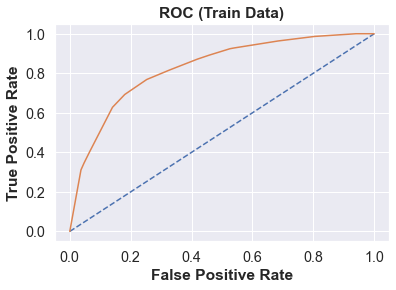

In [126]:
# predict probabilities
sns.set(font_scale=1.3)
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Train Data)',weight='bold')
sns.set(font_scale=1)

### AUC and ROC for the test data

AUC: 0.807


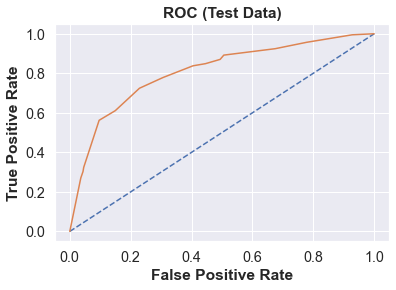

In [127]:
# predict probabilities
sns.set(font_scale=1.3)
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Test Data)',weight='bold')
sns.set(font_scale=1)

### Confusion Matrix for the training data

In [128]:
confusion_matrix(train_labels, ytrain_predict)

array([[1428,  233],
       [ 275,  464]], dtype=int64)

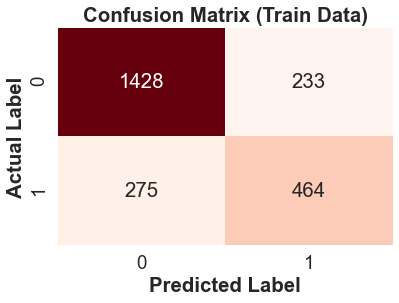

In [129]:
# Get the confusion matrix on the train data
sns.set(font_scale=1.7)
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Reds')
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Train Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

In [130]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.7883333333333333

In [131]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1661
           1       0.67      0.63      0.65       739

    accuracy                           0.79      2400
   macro avg       0.75      0.74      0.75      2400
weighted avg       0.79      0.79      0.79      2400



In [132]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.67
cart_train_recall  0.63
cart_train_f1  0.65


In [133]:
accuracy_score(train_labels,ytrain_predict)

0.7883333333333333

### Confusion Matrix for test data

In [134]:
confusion_matrix(test_labels, ytest_predict)

array([[375,  40],
       [ 81, 104]], dtype=int64)

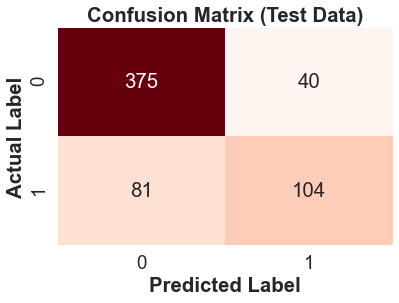

In [135]:
sns.set(font_scale=1.7)
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Reds')
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Test Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

In [136]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7983333333333333

In [137]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       415
           1       0.72      0.56      0.63       185

    accuracy                           0.80       600
   macro avg       0.77      0.73      0.75       600
weighted avg       0.79      0.80      0.79       600



In [138]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.72
cart_test_recall  0.56
cart_test_f1  0.63


In [139]:
accuracy_score(test_labels,ytest_predict)

0.7983333333333333

# Building a Random Forest Classifier

### Grid Search for finding out the optimal values for the hyper parameters

In [140]:
param_grid = {
    'max_depth': [8],  # 10,12,15,20,25
    'max_features': [5], # 4,6
    'min_samples_leaf': [35], # 50,100
    'min_samples_split': [60], # 70,100
    'n_estimators': [151] ## 101,201
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [141]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [8], 'max_features': [5],
                         'min_samples_leaf': [35], 'min_samples_split': [60],
                         'n_estimators': [151]})

In [142]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 5,
 'min_samples_leaf': 35,
 'min_samples_split': 60,
 'n_estimators': 151}

In [143]:
best_grid = grid_search.best_estimator_

In [144]:
best_grid

RandomForestClassifier(max_depth=8, max_features=5, min_samples_leaf=35,
                       min_samples_split=60, n_estimators=151, random_state=1)

## Variable Importance

In [145]:
print(
    pd.DataFrame(best_grid.feature_importances_,
                 columns=["Imp"],
                 index=X_train.columns).sort_values('Imp', ascending=False))

                   Imp
Agency_Code   0.427460
Product Name  0.200882
Sales         0.169103
Commision     0.087551
Duration      0.061165
Age           0.035523
Type          0.013153
Destination   0.005164


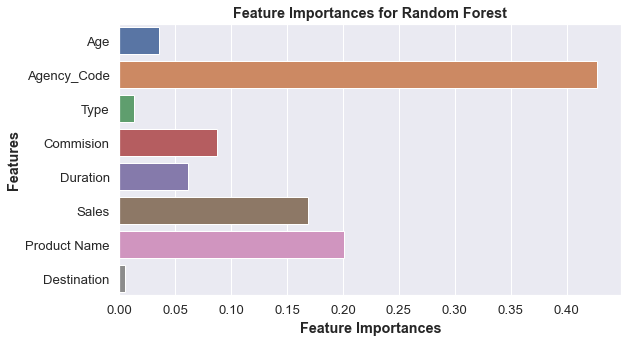

In [146]:
sns.set(font_scale=1.2)
plt.figure(figsize=(9,5))
plt.xlabel('Feature Importances',weight='bold')
plt.ylabel('Features',weight='bold')
plt.title('Feature Importances for Random Forest',weight='bold')
sns.barplot(y=X_train.columns,x=best_grid.feature_importances_,orient='h');
sns.set(font_scale=1)

## Predicting the Training and Testing data

In [147]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## RF Model Performance Evaluation on Training data

In [148]:
confusion_matrix(train_labels,ytrain_predict)

array([[1492,  169],
       [ 310,  429]], dtype=int64)

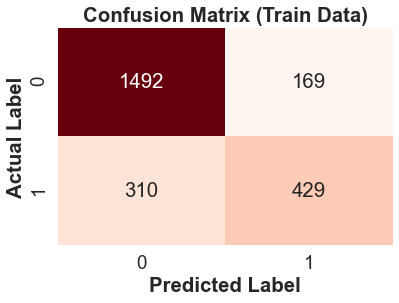

In [149]:
# Get the confusion matrix on the train data
sns.set(font_scale=1.7)
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Reds')
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Train Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

In [150]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.8004166666666667

In [151]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1661
           1       0.72      0.58      0.64       739

    accuracy                           0.80      2400
   macro avg       0.77      0.74      0.75      2400
weighted avg       0.79      0.80      0.79      2400



In [152]:
accuracy_score(test_labels,ytest_predict)

0.7933333333333333

In [153]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.72
rf_train_recall  0.58
rf_train_f1  0.64


Area under Curve is 0.846262542984442


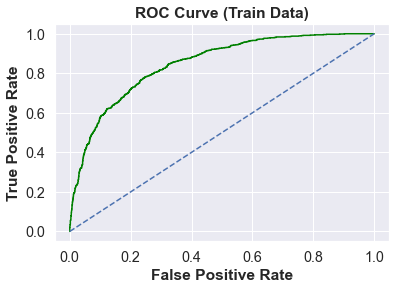

In [154]:
sns.set(font_scale=1.3)
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve (Train Data)',weight='bold')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
sns.set(font_scale=1)

## RF Model Performance Evaluation on Test data

In [155]:
confusion_matrix(test_labels,ytest_predict)

array([[378,  37],
       [ 87,  98]], dtype=int64)

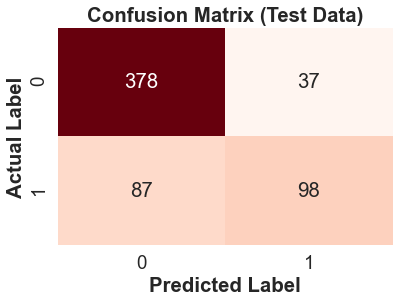

In [156]:
sns.set(font_scale=1.7)
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Reds')
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Test Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

In [157]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7933333333333333

In [158]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       415
           1       0.73      0.53      0.61       185

    accuracy                           0.79       600
   macro avg       0.77      0.72      0.74       600
weighted avg       0.79      0.79      0.78       600



In [159]:
accuracy_score(test_labels,ytest_predict)

0.7933333333333333

In [160]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.73
rf_test_recall  0.53
rf_test_f1  0.61


Area under Curve is 0.822422663627483


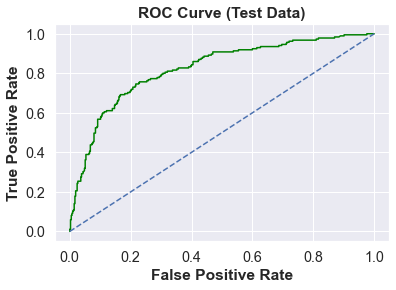

In [161]:
sns.set(font_scale=1.3)
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC Curve (Test Data)',weight='bold')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)
sns.set(font_scale=1)

In [162]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.427460
Product Name  0.200882
Sales         0.169103
Commision     0.087551
Duration      0.061165
Age           0.035523
Type          0.013153
Destination   0.005164


# Building a Neural Network Classifier

In [163]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
X_train = std_scale.fit_transform(X_train)
X_test = std_scale.transform(X_test)

In [164]:
param_grid = {
    'hidden_layer_sizes': [4],   # 3,4,5,6,7,8,9,10,11,12,15,20,50,100,70,72,75,79,81,83,87,90,[4,4],[5,5],[4,5],[5,4],[5,3,2]
    'max_iter': [2500], # 2000,3000,5000
    'solver': ['adam'], #sgd
    'tol': [0.001], # 0.0001
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 5)

In [165]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_

{'hidden_layer_sizes': 4, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.001}

In [166]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=4, max_iter=2500, random_state=1, tol=0.001)

## Predicting the Training and Testing data

In [167]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## NN Model Performance Evaluation on Training data

In [168]:
confusion_matrix(train_labels,ytrain_predict)

array([[1355,  306],
       [ 298,  441]], dtype=int64)

In [169]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.7483333333333333

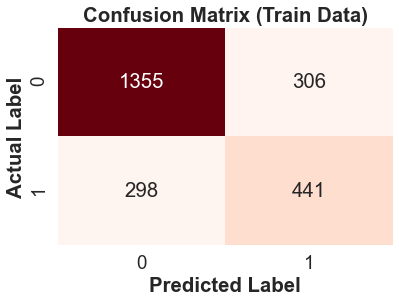

In [170]:
# Get the confusion matrix on the train data
sns.set(font_scale=1.7)
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Reds')
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Train Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

In [171]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1661
           1       0.59      0.60      0.59       739

    accuracy                           0.75      2400
   macro avg       0.71      0.71      0.71      2400
weighted avg       0.75      0.75      0.75      2400



In [172]:
accuracy_score(train_labels,ytrain_predict)

0.7483333333333333

In [173]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.59
nn_train_recall  0.6
nn_train_f1  0.59


Area under Curve is 0.7994849606388377


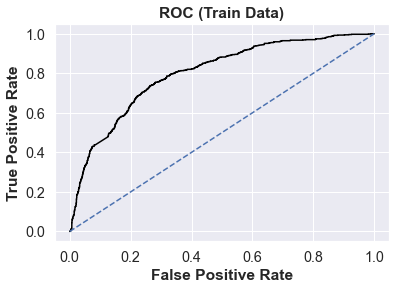

In [174]:
sns.set(font_scale=1.3)
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Train Data)',weight='bold')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)
sns.set(font_scale=1)

## NN Model Performance Evaluation on Test data

In [175]:
confusion_matrix(test_labels,ytest_predict)

array([[354,  61],
       [ 89,  96]], dtype=int64)

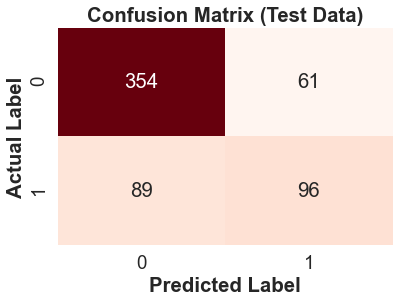

In [176]:
sns.set(font_scale=1.7)
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Reds')
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Test Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

In [177]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.75

In [178]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       415
           1       0.61      0.52      0.56       185

    accuracy                           0.75       600
   macro avg       0.71      0.69      0.69       600
weighted avg       0.74      0.75      0.74       600



In [179]:
accuracy_score(test_labels,ytest_predict)

0.75

In [180]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.61
nn_test_recall  0.52
nn_test_f1  0.56


Area under Curve is 0.7981309019863236


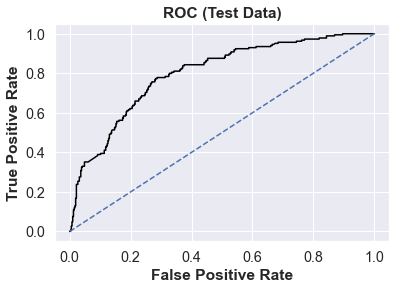

In [181]:
sns.set(font_scale=1.3)
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Test Data)',weight='bold')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)
sns.set(font_scale=1.3)

In [182]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=4, max_iter=2500, random_state=1, tol=0.001)>

# Final Conclusion

## Comparison of the performance metrics from the 3 models

In [183]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

CART Train  CART Test  Random Forest Train  Random Forest Test  \
Accuracy         0.79       0.80                 0.80                0.79   
AUC              0.83       0.81                 0.85                0.82   
Recall           0.63       0.56                 0.58                0.53   
Precision        0.67       0.72                 0.72                0.73   
F1 Score         0.65       0.63                 0.64                0.61   

           Neural Network Train  Neural Network Test  
Accuracy                   0.75                 0.75  
AUC                        0.80                 0.80  
Recall                     0.60                 0.52  
Precision                  0.59                 0.61  
F1 Score                   0.59                 0.56

## ROC Curve for the 3 models on the Training data

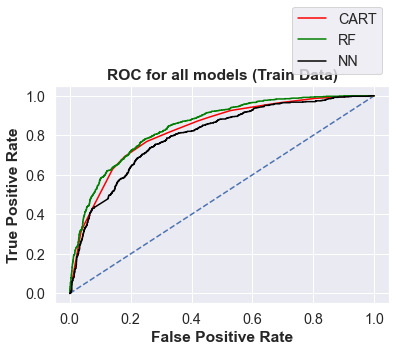

In [184]:
sns.set(font_scale=1.3)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC for all models (Train Data)',weight='bold')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
sns.set(font_scale=1)

## ROC Curve for the 3 models on the Test data

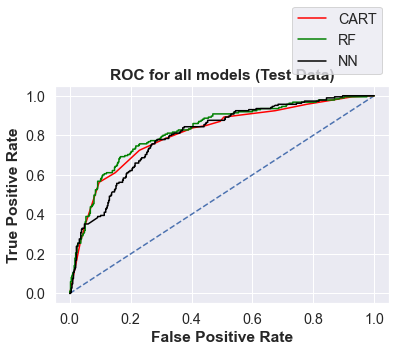

In [185]:
sns.set(font_scale=1.3)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC for all models (Test Data)',weight='bold')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
sns.set(font_scale=1)

Out of the 3 models, Random Forest has slightly better performance than the Cart and Neural network model

Overall all the 3 models are reasonaly stable enough to be used for making any future predictions.